# **결론 : 수비 승리 기여도가 높은 선수들을 하위타선에 배치하면 추정 실점이 낮아진다**

# 라이브러리

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from matplotlib import font_manager, rc, rcParams


In [5]:
# Google Drive에 업로드한 폰트 파일을 Colab으로 복사
!cp /content/NanumGothic.ttf

# 파일이 제대로 복사되었는지 확인
!ls -l /content/NanumGothic.ttf

cp: missing destination file operand after '/content/NanumGothic.ttf'
Try 'cp --help' for more information.
-rw-r--r-- 1 root root 4691820 Jun 24 14:22 /content/NanumGothic.ttf


In [6]:
# 폰트 경로 설정 및 폰트 등록
font_path = '/content/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

# matplotlib 설정 확인
print(rcParams['font.family'])

['NanumGothic']


# KT

## 2023

In [ ]:
df = pd.read_csv('/content/KT_defense_2023.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,장성우,포수,1.260,2023,2,KT,116,104,886,6,0,719,43,10,0.992,2,76,13,14.6
1,알포드,좌익수,0.937,2023,3,KT,112,108,858,3,0,209,5,1,0.986,0,0,0,-
2,박병호,1루수,0.710,2023,7,KT,92,89,730 1/3,5,0,670,61,55,0.993,0,0,0,-
3,김민혁,우익수,0.522,2023,15,KT,46,42,288,2,0,64,0,0,0.97,0,0,0,-
4,황재균,3루수,0.482,2023,4,KT,107,103,895,11,0,82,162,14,0.957,0,0,0,-


In [ ]:
KT_catcher_2023 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
KT_catcher_2023 = KT_catcher_2023.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

KT_2023 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
KT_2023['수비율'] = pd.to_numeric(KT_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
KT_2023 = KT_2023.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 616/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = KT_2023['수비 승리 기여도'].sum()


# 예상 실점 계산
KT_2023['추정실점'] = ((base_runs_per_game * KT_2023['경기']) - (KT_2023['수비 승리 기여도'] * adjustment_factor))/KT_2023['경기'] * 144
KT_2023

<ipython-input-19-c255699e8478>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KT_2023['수비율'] = pd.to_numeric(KT_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,알포드,좌익수,0.937,3,112,108,858,3,0,209,5,1,0.986,603.952857
2,박병호,1루수,0.710,7,92,89,730 1/3,5,0,670,61,55,0.993,604.886957
3,김민혁,우익수,0.522,15,46,42,288,2,0,64,0,0,0.970,599.659130
4,황재균,3루수,0.482,4,107,103,895,11,0,82,162,14,0.957,609.513271
5,송민섭,우익수,0.471,19,42,1,83,0,0,27,0,0,1.000,599.851429
6,김상수,유격수,0.430,1,129,123,1020 1/3,6,0,176,259,54,0.986,611.200000
7,정준영,좌익수,0.332,47,14,2,31,0,0,11,1,0,1.000,581.851429
8,이호연,2루수,0.320,9,64,52,370 1/3,8,0,80,125,19,0.962,608.800000
10,김민혁,좌익수,0.248,15,46,28,275 2/3,1,0,68,1,0,0.986,608.236522
11,장준원,3루수,0.240,31,26,12,109 1/3,0,0,5,17,1,1.000,602.707692


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = KT_2023.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = KT_2023.tail(len(KT_2023) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 6.428404028414416, P-value: 8.229573580468853e-07
<추정득점> T-statistic: -0.5673852308948081, P-value: 0.5753193133013261

하위 타선에 배치된 선수들 평균 추정 실점: 604.5030537818541
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 607.2320677356158


## 2022

In [ ]:
df = pd.read_csv('/content/KT_defense_2022.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,장성우,포수,1.547,2022,5,KT,126,114,952,3,0,665,34,6,0.996,6,54,14,20.6
1,심우준,유격수,0.761,2022,1,KT,144,133,1157,21,0,231,427,94,0.969,0,0,0,-
2,조용호,좌익수,0.633,2022,8,KT,86,69,525 2/3,1,0,107,6,1,0.991,0,0,0,-
3,홍현빈,우익수,0.423,2022,57,KT,4,0,5,0,0,0,0,0,-,0,0,0,-
4,홍현빈,좌익수,0.333,2022,30,KT,26,2,51 1/3,0,0,16,0,0,1.000,0,0,0,-


In [ ]:
KT_catcher_2022 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
KT_catcher_2022 = KT_catcher_2022.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

KT_2022 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
KT_2022['수비율'] = pd.to_numeric(KT_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
KT_2022 = KT_2022.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 562/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = KT_2022['수비 승리 기여도'].sum()


# 예상 실점 계산
KT_2022['추정실점'] = ((base_runs_per_game * KT_2022['경기']) - (KT_2022['수비 승리 기여도'] * adjustment_factor))/KT_2022['경기'] * 144
KT_2022

<ipython-input-14-3ccb03c4180e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KT_2022['수비율'] = pd.to_numeric(KT_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,심우준,유격수,0.761,1,144,133,1157,21,0,231,427,94,0.969,554.390000
2,조용호,좌익수,0.633,8,86,69,525 2/3,1,0,107,6,1,0.991,551.400930
4,홍현빈,좌익수,0.333,30,26,2,51 1/3,0,0,16,0,0,1.000,543.556923
5,김민혁,좌익수,0.331,11,68,48,379 2/3,4,0,97,1,0,0.961,554.990588
6,송민섭,중견수,0.139,42,17,1,38,0,0,16,2,0,1.000,550.225882
7,송민섭,우익수,0.093,14,55,0,85 1/3,0,0,15,1,0,1.000,559.565091
9,강백호,1루수,0.005,4,127,121,1064,10,0,1056,75,111,0.991,561.943307
10,홍현빈,중견수,0.005,46,11,2,22 2/3,0,0,7,0,0,1.000,561.345455
12,송민섭,좌익수,-0.014,14,55,0,93 2/3,0,0,19,1,0,1.000,562.366545
13,김병희,3루수,-0.039,44,14,2,32 2/3,0,0,0,7,1,1.000,566.011429


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = KT_2022.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = KT_2022.tail(len(KT_2022) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 6.261470363940047, P-value: 2.917951574139283e-05
<추정득점> T-statistic: -2.666081343898152, P-value: 0.019408589109810657

하위 타선에 배치된 선수들 평균 추정 실점: 551.0846103861938
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 566.4709702900464


## 2021

In [ ]:
df = pd.read_csv('/content/KT_defense_2021.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,심우준,유격수,1.557,2021,2,KT,138,129,1065,19,0,210,327,78,0.966,0,0,0,-
1,장성우,포수,1.470,2021,5,KT,110,97,813 1/3,7,0,698,43,8,0.991,3,75,19,20.2
2,오윤석,2루수,0.736,2021,16,KT,50,28,258,1,0,44,102,21,0.993,0,0,0,-
3,배정대,중견수,0.463,2021,1,KT,144,139,1189 1/3,3,0,308,7,1,0.991,0,0,0,-
4,송민섭,우익수,0.369,2021,18,KT,48,3,109 1/3,0,0,32,2,1,1.0,0,0,0,-


In [ ]:
KT_catcher_2021 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
KT_catcher_2021 = KT_catcher_2021.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

KT_2021 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
KT_2021['수비율'] = pd.to_numeric(KT_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
KT_2021 = KT_2021.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 584/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = KT_2021['수비 승리 기여도'].sum()


# 예상 실점 계산
KT_2021['추정실점'] = ((base_runs_per_game * KT_2021['경기']) - (KT_2021['수비 승리 기여도'] * adjustment_factor))/KT_2021['경기'] * 144
KT_2021

<ipython-input-3-7efde7d03a17>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KT_2021['수비율'] = pd.to_numeric(KT_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,심우준,유격수,1.557,2,138,129,1065,19,0,210,327,78,0.966,567.753043
2,오윤석,2루수,0.736,16,50,28,258,1,0,44,102,21,0.993,562.803200
3,배정대,중견수,0.463,1,144,139,1189 1/3,3,0,308,7,1,0.991,579.370000
4,송민섭,우익수,0.369,18,48,3,109 1/3,0,0,32,2,1,1.000,572.930000
5,황재균,3루수,0.366,4,114,112,938 1/3,16,0,67,178,21,0.939,579.376842
6,신본기,2루수,0.352,14,52,30,233 2/3,3,0,52,64,16,0.975,574.252308
7,호잉,우익수,0.348,8,68,65,554,3,0,121,4,1,0.977,576.630588
8,송민섭,좌익수,0.338,11,58,0,102 1/3,0,0,22,1,0,1.000,575.608276
11,오윤석,1루수,0.192,23,41,17,171 2/3,1,0,150,15,18,0.994,577.256585
12,홍현빈,좌익수,0.162,36,23,1,49 2/3,0,0,11,1,0,1.000,573.857391


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = KT_2021.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = KT_2021.tail(len(KT_2021) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 4.946053207963893, P-value: 3.874584280789211e-05
<추정득점> T-statistic: -2.5693064158901353, P-value: 0.016276230515636005

하위 타선에 배치된 선수들 평균 추정 실점: 570.7140608695652
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 589.4183773837088


## 2020

In [ ]:
df = pd.read_csv('/content/KT_defense_2020.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,장성우,포수,2.289,2020,5,KT,126,114,952,3,0,665,34,6,0.996,6,54,14,20.6
1,배정대,중견수,1.009,2020,2,KT,143,141,1221 1/3,5,0,354,13,2,0.987,0,0,0,-
2,심우준,유격수,0.938,2020,1,KT,144,133,1157,21,0,231,427,94,0.969,0,0,0,-
3,황재균,3루수,0.930,2020,3,KT,132,128,1113 2/3,13,0,106,213,31,0.961,0,0,0,-
4,박경수,2루수,0.537,2020,6,KT,105,94,746 1/3,8,0,180,286,66,0.983,0,0,0,-


In [ ]:
KT_catcher_2020 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
KT_catcher_2020 = KT_catcher_2020.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

KT_2020 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
KT_2020['수비율'] = pd.to_numeric(KT_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
KT_2020 = KT_2020.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 715/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = KT_2020['수비 승리 기여도'].sum()


# 예상 실점 계산
KT_2020['추정실점'] = ((base_runs_per_game * KT_2020['경기']) - (KT_2020['수비 승리 기여도'] * adjustment_factor))/KT_2020['경기'] * 144
KT_2020

<ipython-input-7-c33b3ab4fcf1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KT_2020['수비율'] = pd.to_numeric(KT_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,배정대,중견수,1.009,2,143,141,1221 1/3,5,0,354,13,2,0.987,704.839441
2,심우준,유격수,0.938,1,144,133,1157,21,0,231,427,94,0.969,705.620000
3,황재균,3루수,0.930,3,132,128,1113 2/3,13,0,106,213,31,0.961,704.854545
4,박경수,2루수,0.537,6,105,94,746 1/3,8,0,180,286,66,0.983,707.635429
5,홍현빈,좌익수,0.286,30,26,2,51 1/3,0,0,16,0,0,1.000,699.160000
6,송민섭,좌익수,0.197,14,55,0,93 2/3,0,0,19,1,0,1.000,709.842182
7,송민섭,중견수,0.175,42,17,1,38,0,0,16,2,0,1.000,700.176471
8,강민국,2루수,0.164,24,34,19,154 2/3,3,0,45,50,21,0.969,708.054118
9,로하스,좌익수,0.149,45,12,4,44 1/3,1,0,15,1,0,0.941,697.120000
10,로하스,우익수,0.116,7,104,102,845 2/3,3,0,204,6,3,0.986,713.393846


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = KT_2020.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = KT_2020.tail(len(KT_2020) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 9.147423203654427, P-value: 1.310896443974009e-09
<추정득점> T-statistic: -1.9136019102504247, P-value: 0.0667413485883559

하위 타선에 배치된 선수들 평균 추정 실점: 705.7373536463535
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 715.7608444313008


## 2019

In [ ]:
df = pd.read_csv('/content/KT_defense_2019.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,심우준,유격수,2.325,2019,3,KT,124,113,976 1/3,9,0,213,290,77,0.982,0,0,0,-
1,박경수,2루수,1.973,2019,1,KT,126,121,983 2/3,9,0,222,349,81,0.984,0,0,0,-
2,황재균,3루수,1.889,2019,4,KT,117,112,964,10,0,103,215,22,0.97,0,0,0,-
3,장성우,포수,1.350,2019,2,KT,125,107,911 2/3,5,0,626,54,4,0.993,10,60,24,28.6
4,배정대,중견수,0.487,2019,20,KT,35,10,149 1/3,1,0,49,1,1,0.98,0,0,0,-


In [ ]:
KT_catcher_2019 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
KT_catcher_2019 = KT_catcher_2019.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

KT_2019 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
KT_2019['수비율'] = pd.to_numeric(KT_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
KT_2019 = KT_2019.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 661/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = KT_2019['수비 승리 기여도'].sum()


# 예상 실점 계산
KT_2019['추정실점'] = ((base_runs_per_game * KT_2019['경기']) - (KT_2019['수비 승리 기여도'] * adjustment_factor))/KT_2019['경기'] * 144
KT_2019

<ipython-input-11-f3f0777efeed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KT_2019['수비율'] = pd.to_numeric(KT_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,심우준,유격수,2.325,3,124,113,976 1/3,9,0,213,290,77,0.982,634.000000
1,박경수,2루수,1.973,1,126,121,983 2/3,9,0,222,349,81,0.984,638.451429
2,황재균,3루수,1.889,4,117,112,964,10,0,103,215,22,0.970,637.750769
4,배정대,중견수,0.487,20,35,10,149 1/3,1,0,49,1,1,0.980,640.963429
5,박승욱,1루수,0.464,11,52,25,252 1/3,2,0,265,21,27,0.993,648.150769
6,김민혁,좌익수,0.382,6,96,85,710 2/3,4,0,160,1,1,0.976,655.270000
7,송민섭,좌익수,0.374,26,29,3,63 1/3,0,0,19,1,0,1.000,642.428966
9,김민혁,중견수,0.277,29,27,25,192,0,0,57,0,0,1.000,646.226667
11,박승욱,2루수,0.199,17,42,17,200,2,0,50,54,16,0.981,654.177143
12,심우준,3루수,0.185,46,11,1,32 1/3,1,0,1,13,0,0.933,636.781818


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = KT_2019.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = KT_2019.tail(len(KT_2019) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 8.000286690086405, P-value: 1.1650176421503765e-07
<추정득점> T-statistic: -3.2437461343639318, P-value: 0.004068464688009324

하위 타선에 배치된 선수들 평균 추정 실점: 637.7914065934066
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 653.3977879627745


# NC

## 2023

In [ ]:
df = pd.read_csv('/content/NC_defense_2023.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,박민우,2루수,1.426,2023,2,NC,114,108,874 2/3,15,0,196,264,56,0.968,0,0,0,-
1,김주원,유격수,0.704,2023,1,NC,127,122,1030,29,0,177,313,67,0.944,0,0,0,-
2,서호철,3루수,0.701,2023,3,NC,96,78,690,10,0,66,133,19,0.952,0,0,0,-
3,김형준,포수,0.616,2023,33,NC,24,19,180,2,0,160,7,1,0.988,0,10,3,23.1
4,서호철,2루수,0.343,2023,26,NC,30,23,190 2/3,4,0,44,64,19,0.964,0,0,0,-


In [ ]:
NC_catcher_2023 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
NC_catcher_2023 = NC_catcher_2023.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

NC_2023 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
NC_2023['수비율'] = pd.to_numeric(NC_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
NC_2023 = NC_2023.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 617/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = NC_2023['수비 승리 기여도'].sum()


# 예상 실점 계산
NC_2023['추정실점'] = ((base_runs_per_game * NC_2023['경기']) - (NC_2023['수비 승리 기여도'] * adjustment_factor))/NC_2023['경기'] * 144
NC_2023

<ipython-input-22-08d72b533159>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NC_2023['수비율'] = pd.to_numeric(NC_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,박민우,2루수,1.426,2,114,108,874 2/3,15,0,196,264,56,0.968,598.987368
1,김주원,유격수,0.704,1,127,122,1030,29,0,177,313,67,0.944,609.017638
2,서호철,3루수,0.701,3,96,78,690,10,0,66,133,19,0.952,606.485000
4,서호철,2루수,0.343,26,30,23,190 2/3,4,0,44,64,19,0.964,600.536000
5,도태훈,3루수,0.321,18,56,36,347 2/3,3,0,26,62,7,0.967,608.745714
6,한석현,좌익수,0.311,37,20,6,77,0,0,20,0,0,1.000,594.608000
7,김한별,유격수,0.308,20,47,22,232 1/3,3,0,24,74,14,0.970,607.563404
8,천재환,좌익수,0.302,43,15,2,46,0,0,15,0,0,1.000,588.008000
9,김성욱,좌익수,0.220,25,31,19,167 2/3,0,0,37,0,0,1.000,606.780645
10,도태훈,1루수,0.215,16,59,23,287,1,0,260,19,28,0.996,611.752542


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = NC_2023.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = NC_2023.tail(len(NC_2023) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 4.804934700450486, P-value: 7.571561419725008e-05
<추정득점> T-statistic: -1.3830476670045089, P-value: 0.1799306457757051

하위 타선에 배치된 선수들 평균 추정 실점: 603.7565015540821
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 614.2121304558017


- 추정 실점: 하위 타선에 수비 능력이 높은 선수를 배치한 경우와 그렇지 않은 경우의 추정 실점 차이는 통계적으로 유의미하지 않습니다.

## 2022

In [ ]:
df = pd.read_csv('/content/NC_defense_2022.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,김주원,유격수,2.009,2022,4,NC,79,70,636 1/3,11,0,139,206,48,0.969,0,0,0,-
1,양의지,포수,1.095,2022,3,NC,96,89,736 2/3,2,1,688,54,5,0.997,5,26,19,42.2
2,김주원,2루수,0.671,2022,39,NC,20,11,94,0,0,28,28,7,1.000,0,0,0,-
3,박민우,2루수,0.558,2022,2,NC,100,97,840,8,0,197,246,59,0.982,0,0,0,-
4,도태훈,3루수,0.555,2022,29,NC,30,16,158 1/3,2,0,12,35,9,0.959,0,0,0,-


In [ ]:
NC_catcher_2022 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
NC_catcher_2022 = NC_catcher_2022.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

NC_2022 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
NC_2022['수비율'] = pd.to_numeric(NC_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
NC_2022 = NC_2022.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 642/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = NC_2022['수비 승리 기여도'].sum()


# 예상 실점 계산
NC_2022['추정실점'] = ((base_runs_per_game * NC_2022['경기']) - (NC_2022['수비 승리 기여도'] * adjustment_factor))/NC_2022['경기'] * 144
NC_2022

<ipython-input-26-ac66d2d8e24b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NC_2022['수비율'] = pd.to_numeric(NC_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,김주원,유격수,2.009,4,79,70,636 1/3,11,0,139,206,48,0.969,605.380253
2,김주원,2루수,0.671,39,20,11,94,0,0,28,28,7,1.000,593.688000
3,박민우,2루수,0.558,2,100,97,840,8,0,197,246,59,0.982,633.964800
4,도태훈,3루수,0.555,29,30,16,158 1/3,2,0,12,35,9,0.959,615.360000
5,김기환,중견수,0.532,21,44,20,209,1,0,60,1,0,0.984,624.589091
6,손아섭,우익수,0.487,1,108,108,894 2/3,3,0,193,7,3,0.985,635.506667
7,권희동,좌익수,0.245,34,25,17,146 2/3,0,0,40,0,0,1.000,627.888000
9,서호철,2루수,0.189,22,41,27,258,1,0,54,74,15,0.992,635.361951
10,김한별,유격수,0.141,37,23,4,75,3,0,9,19,2,0.903,633.172174
14,도태훈,2루수,0.091,42,18,9,88,0,0,19,32,3,1.000,634.720000


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = NC_2022.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = NC_2022.tail(len(NC_2022) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 5.618382555168008, P-value: 3.6477563833976476e-06
<추정득점> T-statistic: -5.656815133138984, P-value: 3.2678069778385907e-06

하위 타선에 배치된 선수들 평균 추정 실점: 612.0982632911391
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 646.966342512017


## 2021

In [ ]:
df = pd.read_csv('/content/NC_defense_2021.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,김태군,포수,1.502,2021,4,NC,100,76,666,6,0,568,48,9,0.99,1,47,18,27.7
1,박민우,2루수,1.070,2021,14,NC,49,48,384,3,0,103,109,22,0.986,0,0,0,-
2,노진혁,유격수,0.580,2021,5,NC,65,61,503 2/3,5,0,84,136,29,0.978,0,0,0,-
3,최정원,2루수,0.498,2021,5,NC,65,56,451 1/3,7,0,92,133,19,0.97,0,0,0,-
4,알테어,중견수,0.471,2021,1,NC,134,129,1078 2/3,2,0,319,4,2,0.994,0,0,0,-


In [ ]:
NC_catcher_2021 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
NC_catcher_2021 = NC_catcher_2021.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

NC_2021 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
NC_2021['수비율'] = pd.to_numeric(NC_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
NC_2021 = NC_2021.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 697/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = NC_2021['수비 승리 기여도'].sum()


# 예상 실점 계산
NC_2021['추정실점'] = ((base_runs_per_game * NC_2021['경기']) - (NC_2021['수비 승리 기여도'] * adjustment_factor))/NC_2021['경기'] * 144
NC_2021

<ipython-input-29-d1115a73e791>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NC_2021['수비율'] = pd.to_numeric(NC_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,박민우,2루수,1.070,14,49,48,384,3,0,103,109,22,0.986,665.555102
2,노진혁,유격수,0.580,5,65,61,503 2/3,5,0,84,136,29,0.978,684.150769
3,최정원,2루수,0.498,5,65,56,451 1/3,7,0,92,133,19,0.970,685.967385
4,알테어,중견수,0.471,1,134,129,1078 2/3,2,0,319,4,2,0.994,691.938507
5,김주원,유격수,0.403,13,51,40,346 1/3,10,0,73,97,17,0.944,685.621176
6,김주원,2루수,0.224,34,28,13,121 1/3,2,0,23,42,7,0.970,685.480000
7,최승민,좌익수,0.209,46,15,3,43,0,0,14,0,0,1.000,676.936000
9,박준영,3루수,0.161,5,65,39,353 2/3,3,0,31,65,10,0.970,693.433231
10,박석민,3루수,0.120,16,47,44,330 2/3,8,0,29,81,5,0.932,693.323404
13,김기환,좌익수,0.077,11,55,37,318,2,0,73,1,0,0.974,694.984000


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = NC_2021.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = NC_2021.tail(len(NC_2021) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 6.501765408049991, P-value: 1.2362569584320428e-06
<추정득점> T-statistic: -3.128953895185796, P-value: 0.00471249208588286

하위 타선에 배치된 선수들 평균 추정 실점: 681.902940837414
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 697.7668531243589


## 2020

In [ ]:
df = pd.read_csv('/content/NC_defense_2020.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,박민우,2루수,1.918,2020,3,NC,123,116,943 2/3,10,0,250,278,71,0.981,0,0,0,-
1,노진혁,유격수,1.516,2020,2,NC,125,115,955 2/3,8,0,174,274,56,0.982,0,0,0,-
2,양의지,포수,1.381,2020,7,NC,106,97,792,2,2,645,47,4,0.997,5,32,24,42.9
3,김태군,포수,0.855,2020,8,NC,75,34,335 1/3,3,0,297,19,4,0.991,2,16,8,33.3
4,지석훈,2루수,0.397,2020,34,NC,25,14,127,1,0,34,39,14,0.986,0,0,0,-


In [ ]:
NC_catcher_2020 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
NC_catcher_2020 = NC_catcher_2020.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

NC_2020 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
NC_2020['수비율'] = pd.to_numeric(NC_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
NC_2020 = NC_2020.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 714/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = NC_2020['수비 승리 기여도'].sum()


# 예상 실점 계산
NC_2020['추정실점'] = ((base_runs_per_game * NC_2020['경기']) - (NC_2020['수비 승리 기여도'] * adjustment_factor))/NC_2020['경기'] * 144
NC_2020

<ipython-input-33-9a086d343297>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NC_2020['수비율'] = pd.to_numeric(NC_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,박민우,2루수,1.918,3,123,116,943 2/3,10,0,250,278,71,0.981,691.545366
1,노진혁,유격수,1.516,2,125,115,955 2/3,8,0,174,274,56,0.982,696.535680
4,지석훈,2루수,0.397,34,25,14,127,1,0,34,39,14,0.986,691.132800
5,지석훈,유격수,0.299,39,23,8,88,1,0,19,24,4,0.977,695.280000
6,김성욱,중견수,0.279,32,27,7,94,0,0,29,0,0,1.000,699.120000
7,지석훈,3루수,0.170,17,50,13,165 2/3,3,0,17,45,5,0.954,709.104000
9,권희동,우익수,0.129,12,65,56,453 2/3,1,0,105,7,1,0.991,711.142154
11,노진혁,3루수,0.104,44,17,4,46 1/3,1,0,5,12,3,0.944,705.190588
12,김준완,중견수,0.089,47,15,5,53,0,0,19,1,0,1.000,705.456000
13,권희동,좌익수,0.078,9,69,31,321 2/3,1,0,73,2,0,0.987,712.372174


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = NC_2020.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = NC_2020.tail(len(NC_2020) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 5.801329975574394, P-value: 7.76101127837347e-06
<추정득점> T-statistic: -4.5250896457102625, P-value: 0.00016730154500918946

하위 타선에 배치된 선수들 평균 추정 실점: 693.6234614634145
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 714.9049716958091


## 2019

In [ ]:
df = pd.read_csv('/content/NC_defense_2019.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,노진혁,3루수,1.252,2019,18,NC,52,31,301,3,0,19,82,12,0.971,0,0,0,-
1,박민우,2루수,1.148,2019,1,NC,116,111,928 1/3,9,0,232,301,63,0.983,0,0,0,-
2,김태진,좌익수,0.666,2019,20,NC,50,36,311,0,0,81,3,1,1.0,0,0,0,-
3,노진혁,유격수,0.647,2019,5,NC,70,61,497,2,0,80,165,29,0.992,0,0,0,-
4,손시헌,유격수,0.523,2019,6,NC,67,35,344 1/3,4,0,54,138,31,0.98,0,0,0,-


In [ ]:
NC_catcher_2019 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
NC_catcher_2019 = NC_catcher_2019.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

NC_2019 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
NC_2019['수비율'] = pd.to_numeric(NC_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
NC_2019 = NC_2019.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 631/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = NC_2019['수비 승리 기여도'].sum()


# 예상 실점 계산
NC_2019['추정실점'] = ((base_runs_per_game * NC_2019['경기']) - (NC_2019['수비 승리 기여도'] * adjustment_factor))/NC_2019['경기'] * 144
NC_2019

<ipython-input-37-1fa090aa8baf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NC_2019['수비율'] = pd.to_numeric(NC_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,노진혁,3루수,1.252,18,52,31,301,3,0,19,82,12,0.971,596.329231
1,박민우,2루수,1.148,1,116,111,928 1/3,9,0,232,301,63,0.983,616.748966
2,김태진,좌익수,0.666,20,50,36,311,0,0,81,3,1,1.000,611.819200
3,노진혁,유격수,0.647,5,70,61,497,2,0,80,165,29,0.992,617.690286
4,손시헌,유격수,0.523,6,67,35,344 1/3,4,0,54,138,31,0.980,619.759403
6,김태진,2루수,0.364,50,14,10,92,0,0,21,41,13,1.000,593.560000
8,지석훈,유격수,0.244,45,16,12,103,1,0,23,39,5,0.984,609.040000
9,김찬형,유격수,0.220,14,58,36,340,3,0,62,106,22,0.982,625.537931
10,김성욱,중견수,0.209,2,101,80,728 2/3,2,0,180,3,1,0.989,628.020198
11,지석훈,3루수,0.148,21,48,21,235 2/3,4,0,19,56,6,0.949,626.560000


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = NC_2019.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = NC_2019.tail(len(NC_2019) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 7.580189432289793, P-value: 4.786803627021945e-08
<추정득점> T-statistic: -3.0842121818351385, P-value: 0.004792634470342837

하위 타선에 배치된 선수들 평균 추정 실점: 610.6469205001895
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 631.3310768169409


# LG

## 2023

In [ ]:
df = pd.read_csv('/content/LG_defense_2023.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,박해민,중견수,2.029,2023,1,LG,142,136,1187 2/3,3,0,338,2,1,0.991,0,0,0,-
1,오지환,유격수,1.470,2023,4,LG,125,115,1010 2/3,14,0,176,275,64,0.97,0,0,0,-
2,홍창기,좌익수,0.661,2023,27,LG,27,27,228,0,0,64,0,0,1.000,0,0,0,-
3,김민성,3루수,0.588,2023,27,LG,27,14,135,1,0,14,27,4,0.976,0,0,0,-
4,김민성,2루수,0.572,2023,16,LG,45,37,280,1,0,68,79,17,0.993,0,0,0,-


In [ ]:
LG_catcher_2023 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
LG_catcher_2023 = LG_catcher_2023.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

LG_2023 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
LG_2023['수비율'] = pd.to_numeric(LG_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
LG_2023 = LG_2023.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 610/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = LG_2023['수비 승리 기여도'].sum()


# 예상 실점 계산
LG_2023['추정실점'] = ((base_runs_per_game * LG_2023['경기']) - (LG_2023['수비 승리 기여도'] * adjustment_factor))/LG_2023['경기'] * 144
LG_2023

<ipython-input-41-823bdb26017e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LG_2023['수비율'] = pd.to_numeric(LG_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,박해민,중견수,2.029,1,142,136,1187 2/3,3,0,338,2,1,0.991,589.424225
1,오지환,유격수,1.470,4,125,115,1010 2/3,14,0,176,275,64,0.970,593.065600
2,홍창기,좌익수,0.661,27,27,27,228,0,0,64,0,0,1.000,574.746667
3,김민성,3루수,0.588,27,27,14,135,1,0,14,27,4,0.976,578.640000
4,김민성,2루수,0.572,16,45,37,280,1,0,68,79,17,0.993,591.696000
5,문성주,좌익수,0.478,8,85,63,602 2/3,1,0,162,1,0,0.994,601.902118
6,홍창기,우익수,0.407,6,104,97,841 2/3,2,0,198,7,3,0.990,604.364615
7,신민재,2루수,0.341,7,89,76,689 1/3,9,0,162,231,57,0.978,604.482697
8,문성주,우익수,0.188,14,56,43,386 2/3,2,0,97,4,0,0.981,605.165714
10,김현수,1루수,0.117,44,10,10,68 1/3,2,0,53,11,5,0.970,593.152000


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = LG_2023.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = LG_2023.tail(len(LG_2023) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 5.849981889263415, P-value: 5.818686692609559e-06
<추정득점> T-statistic: -4.175806452806081, P-value: 0.00036328179568047276

하위 타선에 배치된 선수들 평균 추정 실점: 583.9691230046947
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 615.4040287630494


## 2022

In [ ]:
df = pd.read_csv('/content/LG_defense_2022.csv',encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,박해민,중견수,2.591,2022,1,LG,144,142,1205,2,0,355,3,0,0.994,0,0,0,-
1,오지환,유격수,2.123,2022,2,LG,142,137,1167,16,0,210,359,83,0.973,0,0,0,-
2,유강남,포수,1.016,2022,3,LG,134,115,1008 1/3,7,1,821,71,8,0.992,4,91,19,17.3
3,문보경,3루수,0.824,2022,6,LG,97,94,749,4,0,40,135,20,0.978,0,0,0,-
4,문성주,우익수,0.478,2022,22,LG,32,26,242 1/3,0,0,53,2,0,1.0,0,0,0,-


In [ ]:
LG_catcher_2022 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
LG_catcher_2022 = LG_catcher_2022.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

LG_2022 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
LG_2022['수비율'] = pd.to_numeric(LG_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
LG_2022 = LG_2022.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 521/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = LG_2022['수비 승리 기여도'].sum()


# 예상 실점 계산
LG_2022['추정실점'] = ((base_runs_per_game * LG_2022['경기']) - (LG_2022['수비 승리 기여도'] * adjustment_factor))/LG_2022['경기'] * 144
LG_2022

<ipython-input-46-2827bf3766fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LG_2022['수비율'] = pd.to_numeric(LG_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,박해민,중견수,2.591,1,144,142,1205,2,0,355,3,0,0.994,495.090000
1,오지환,유격수,2.123,2,142,137,1167,16,0,210,359,83,0.973,499.470986
3,문보경,3루수,0.824,6,97,94,749,4,0,40,135,20,0.978,508.767423
4,문성주,우익수,0.478,22,32,26,242 1/3,0,0,53,2,0,1.000,499.490000
5,문성주,좌익수,0.248,25,28,23,213,0,0,71,2,0,1.000,508.245714
6,홍창기,중견수,0.181,37,16,2,44,0,0,14,0,0,1.000,504.710000
7,이영빈,유격수,0.178,30,23,3,62,1,0,11,24,4,0.972,509.855652
9,루이즈,3루수,0.154,33,22,20,174,2,0,19,31,3,0.962,510.920000
13,이상호,2루수,0.088,22,32,8,123,2,0,27,43,8,0.972,517.040000
15,홍창기,우익수,0.081,5,104,97,828 2/3,1,0,165,6,3,0.994,519.878462


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = LG_2022.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = LG_2022.tail(len(LG_2022) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 5.689213517418708, P-value: 3.354306753046873e-05
<추정득점> T-statistic: -4.035419347727874, P-value: 0.0009579956590506305

하위 타선에 배치된 선수들 평균 추정 실점: 500.70460214897633
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 518.6904659249077


## 2021

In [ ]:
df = pd.read_csv('/content/LG_defense_2021.csv',encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,오지환,유격수,2.706,2021,1,LG,132,129,1060 2/3,13,0,175,359,90,0.976,0,0,0,-
1,김민성,3루수,1.198,2021,4,LG,117,107,854,7,0,54,176,22,0.97,0,0,0,-
2,유강남,포수,0.678,2021,3,LG,129,117,961,3,1,829,66,7,0.997,9,77,23,23.0
3,김용의,1루수,0.613,2021,8,LG,79,3,155 2/3,1,0,153,15,18,0.994,0,0,0,-
4,서건창,2루수,0.508,2021,2,LG,131,127,1038 1/3,8,0,253,307,82,0.986,0,0,0,-


In [ ]:
LG_catcher_2021 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
LG_catcher_2021 = LG_catcher_2021.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

LG_2021 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
LG_2021['수비율'] = pd.to_numeric(LG_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
LG_2021 = LG_2021.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 561/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = LG_2021['수비 승리 기여도'].sum()


# 예상 실점 계산
LG_2021['추정실점'] = ((base_runs_per_game * LG_2021['경기']) - (LG_2021['수비 승리 기여도'] * adjustment_factor))/LG_2021['경기'] * 144
LG_2021

<ipython-input-49-d0b82d868295>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LG_2021['수비율'] = pd.to_numeric(LG_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,오지환,유격수,2.706,1,132,129,1060 2/3,13,0,175,359,90,0.976,531.480000
1,김민성,3루수,1.198,4,117,107,854,7,0,54,176,22,0.970,546.255385
3,김용의,1루수,0.613,8,79,3,155 2/3,1,0,153,15,18,0.994,549.826329
4,서건창,2루수,0.508,2,131,127,1038 1/3,8,0,253,307,82,0.986,555.415878
5,홍창기,우익수,0.238,28,31,23,206 2/3,0,0,46,1,0,1.000,549.944516
7,정주현,2루수,0.204,9,72,67,505,12,0,110,188,44,0.961,556.920000
8,구본혁,유격수,0.202,20,44,6,113 1/3,1,0,17,48,13,0.985,554.389091
9,이상호,3루수,0.200,51,12,3,50,0,0,3,11,1,1.000,537.000000
10,구본혁,3루수,0.163,23,35,1,62 2/3,0,0,6,15,2,1.000,554.293714
13,문보경,1루수,0.130,14,61,48,390 2/3,2,0,403,38,45,0.995,557.931148


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = LG_2021.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = LG_2021.tail(len(LG_2021) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 4.945025940656004, P-value: 0.00010458672052098094
<추정득점> T-statistic: -2.6833808975747315, P-value: 0.015177594577200781

하위 타선에 배치된 선수들 평균 추정 실점: 545.7443978979761
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 557.188052091047


## 2020

In [ ]:
df = pd.read_csv('/content/LG_defense_2020.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,오지환,유격수,3.116,2020,1,LG,141,136,1142,15,0,184,405,100,0.975,0,0,0,-
1,홍창기,중견수,0.799,2020,8,LG,82,67,574 2/3,2,0,170,4,1,0.989,0,0,0,-
2,양석환,1루수,0.277,2020,39,LG,19,16,128 2/3,0,0,121,13,16,1.000,0,0,0,-
3,홍창기,좌익수,0.206,2020,21,LG,41,13,157 2/3,0,0,42,1,0,1.000,0,0,0,-
4,김용의,1루수,0.205,2020,11,LG,73,5,184 2/3,0,0,174,21,19,1.000,0,0,0,-


In [ ]:
LG_catcher_2020 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
LG_catcher_2020 = LG_catcher_2020.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

LG_2020 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
LG_2020['수비율'] = pd.to_numeric(LG_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
LG_2020 = LG_2020.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 694/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = LG_2020['수비 승리 기여도'].sum()


# 예상 실점 계산
LG_2020['추정실점'] = ((base_runs_per_game * LG_2020['경기']) - (LG_2020['수비 승리 기여도'] * adjustment_factor))/LG_2020['경기'] * 144
LG_2020

<ipython-input-53-e81d92e9eadd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LG_2020['수비율'] = pd.to_numeric(LG_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,오지환,유격수,3.116,1,141,136,1142,15,0,184,405,100,0.975,662.177021
1,홍창기,중견수,0.799,8,82,67,574 2/3,2,0,170,4,1,0.989,679.968780
2,양석환,1루수,0.277,39,19,16,128 2/3,0,0,121,13,16,1.000,673.006316
3,홍창기,좌익수,0.206,21,41,13,157 2/3,0,0,42,1,0,1.000,686.764878
4,김용의,1루수,0.205,11,73,5,184 2/3,0,0,174,21,19,1.000,689.956164
5,장준원,3루수,0.163,24,35,17,157,0,0,11,24,4,1.000,687.293714
7,구본혁,2루수,0.124,18,47,1,107,0,0,13,38,10,1.000,690.200851
8,정주현,2루수,0.110,3,127,111,896,10,0,211,321,90,0.982,692.752756
13,신민재,2루수,0.065,45,11,1,20,0,0,5,4,2,1.000,685.490909
15,구본혁,유격수,0.061,20,42,7,116 2/3,2,0,21,37,5,0.967,691.908571


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = LG_2020.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = LG_2020.tail(len(LG_2020) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 4.041772876851295, P-value: 0.00047409912677335534
<추정득점> T-statistic: -4.045942821508239, P-value: 0.0004691243783470389

하위 타선에 배치된 선수들 평균 추정 실점: 675.4792489006638
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 700.1346131014614


## 2019

In [ ]:
df = pd.read_csv('/content/LG_defense_2019.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,오지환,유격수,3.732,2019,1,LG,134,131,1101,12,0,214,402,100,0.981,0,0,0,-
1,유강남,포수,1.313,2019,2,LG,128,115,968 1/3,7,0,757,61,9,0.992,5,84,25,22.9
2,정주현,2루수,1.023,2019,2,LG,128,124,972,13,0,209,307,77,0.975,0,0,0,-
3,이형종,우익수,0.955,2019,19,LG,37,30,268,0,0,85,5,1,1.000,0,0,0,-
4,이성우,포수,0.701,2019,13,LG,53,19,210,3,0,143,16,0,0.981,0,23,8,25.8


In [ ]:
LG_catcher_2019 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
LG_catcher_2019 = LG_catcher_2019.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

LG_2019 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
LG_2019['수비율'] = pd.to_numeric(LG_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
LG_2019 = LG_2019.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 633/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = LG_2019['수비 승리 기여도'].sum()


# 예상 실점 계산
LG_2019['추정실점'] = ((base_runs_per_game * LG_2019['경기']) - (LG_2019['수비 승리 기여도'] * adjustment_factor))/LG_2019['경기'] * 144
LG_2019

<ipython-input-57-7cfae42bf8b3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LG_2019['수비율'] = pd.to_numeric(LG_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,오지환,유격수,3.732,1,134,131,1101,12,0,214,402,100,0.981,592.894925
2,정주현,2루수,1.023,2,128,124,972,13,0,209,307,77,0.975,621.491250
3,이형종,우익수,0.955,19,37,30,268,0,0,85,5,1,1.000,595.832432
5,조셉,1루수,0.367,15,45,44,357,4,0,352,33,36,0.990,621.256000
6,김용의,1루수,0.317,8,96,40,481,5,0,452,41,37,0.990,628.245000
7,윤진호,2루수,0.271,14,51,0,101,0,0,25,41,11,1.000,625.348235
8,이형종,중견수,0.219,29,28,21,170 1/3,0,0,53,0,0,1.000,621.737143
9,윤진호,3루수,0.177,18,39,2,100,1,0,4,21,2,0.962,626.464615
11,구본혁,유격수,0.170,31,25,9,111,1,0,13,47,6,0.984,623.208000
12,김민성,3루수,0.165,7,105,104,841 2/3,6,0,61,177,12,0.975,630.737143


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = LG_2019.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = LG_2019.tail(len(LG_2019) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 4.377028824241652, P-value: 0.0003242256591903617
<추정득점> T-statistic: -3.853133264958563, P-value: 0.0010715769422598822

하위 타선에 배치된 선수들 평균 추정 실점: 607.8686519513916
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 636.8479788601712


# KIA

## 2023

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_defense_2023.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,박찬호,유격수,2.093,2023,KIA,128,121,1042 2/3,14,0,206,303,68,0.973,0,0,0,-
1,김호령,중견수,1.152,2023,KIA,68,22,288 1/3,1,0,97,0,0,0.990,0,0,0,-
2,김도영,3루수,1.120,2023,KIA,81,81,695 1/3,11,0,68,140,16,0.950,0,0,0,-
3,소크라테스,중견수,0.697,2023,KIA,113,106,827 1/3,2,0,249,2,0,0.992,0,0,0,-
4,김태군,포수,0.686,2023,KIA,87,72,619,4,0,462,47,6,0.992,3,42,13,23.6


In [ ]:
k_catcher_2023 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
k_catcher_2023 = k_catcher_2023.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

k_2023 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
k_2023['수비율'] = pd.to_numeric(k_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
k_2023 = k_2023.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 650/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = k_2023['수비 승리 기여도'].sum()


# 예상 실점 계산
k_2023['추정실점'] = ((base_runs_per_game * k_2023['경기']) - (k_2023['수비 승리 기여도'] * adjustment_factor))/k_2023['경기'] * 144
k_2023

<ipython-input-10-3bdea51f5bb5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_2023['수비율'] = pd.to_numeric(k_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,박찬호,유격수,2.093,128,121,1042 2/3,14,0,206,303,68,0.973,626.453750
1,김호령,중견수,1.152,68,22,288 1/3,1,0,97,0,0,0.990,625.604706
2,김도영,3루수,1.120,81,81,695 1/3,11,0,68,140,16,0.950,630.088889
3,소크라테스,중견수,0.697,113,106,827 1/3,2,0,249,2,0,0.992,641.117876
5,김규성,유격수,0.578,33,20,187 1/3,2,0,45,63,22,0.982,624.778182
8,이우성,우익수,0.181,69,54,429 2/3,0,0,102,4,1,1.000,646.222609
11,이창진,우익수,0.115,16,13,96 1/3,0,0,18,3,1,1.000,639.650000
12,박정우,우익수,0.114,13,1,28 1/3,0,0,6,0,0,1.000,637.372308
15,최정용,2루수,0.061,37,4,85 1/3,1,0,13,34,7,0.979,647.625946
16,홍종표,2루수,0.058,13,1,25,0,0,2,7,1,1.000,643.575385


In [ ]:
from scipy.stats import ttest_ind

# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = k_2023.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = k_2023.tail(len(k_2023) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 7.1069615662749985, P-value: 2.3996080857588807e-07
<추정득점> T-statistic: -2.845837228427493, P-value: 0.008923742338317367

하위 타선에 배치된 선수들 평균 추정 실점: 630.8163052193593
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 654.978682683626


## 2022

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_defense_2022.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,박찬호,유격수,1.330,2022,KIA,130,128,1103 1/3,22,0,215,338,66,0.962,0,0,0,-
1,박동원,포수,1.141,2022,KIA,114,98,865,5,2,703,71,8,0.994,5,40,22,35.5
2,김도영,유격수,0.841,2022,KIA,28,16,160 2/3,2,0,29,47,7,0.974,0,0,0,-
3,한승택,포수,0.699,2022,KIA,64,34,299 2/3,0,1,243,25,0,1.000,2,17,7,29.2
4,김도영,3루수,0.409,2022,KIA,69,44,407,11,0,47,83,8,0.922,0,0,0,-


In [ ]:
k_catcher_2022 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
k_catcher_2022 = k_catcher_2022.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

k_2022 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
k_2022['수비율'] = pd.to_numeric(k_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
k_2022 = k_2022.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 679/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = k_2022['수비 승리 기여도'].sum()


# 예상 실점 계산
k_2022['추정실점'] = ((base_runs_per_game * k_2022['경기']) - (k_2022['수비 승리 기여도'] * adjustment_factor))/k_2022['경기'] * 144
k_2022

<ipython-input-13-ce833b62f647>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_2022['수비율'] = pd.to_numeric(k_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,박찬호,유격수,1.330,130,128,1103 1/3,22,0,215,338,66,0.962,664.267692
2,김도영,유격수,0.841,28,16,160 2/3,2,0,29,47,7,0.974,635.748571
4,김도영,3루수,0.409,69,44,407,11,0,47,83,8,0.922,670.464348
5,소크라테스,중견수,0.141,123,122,1009 2/3,5,0,302,1,0,0.984,677.349268
6,류지혁,1루수,0.118,36,14,158,2,0,155,5,11,0.988,674.280000
8,최형우,좌익수,0.113,19,17,133,0,0,34,1,0,1.000,670.435789
11,김선빈,2루수,0.071,137,134,1134 1/3,10,0,246,334,80,0.983,678.253723
12,김호령,중견수,0.066,48,19,209,3,0,66,2,0,0.958,677.020000
14,김석환,좌익수,0.058,29,20,173,0,0,33,0,0,1.000,676.120000
23,김규성,2루수,-0.043,24,7,77 2/3,1,0,21,13,2,0.971,681.580000


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = k_2022.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = k_2022.tail(len(k_2022) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 4.0741301832741454, P-value: 0.000712053468283143
<추정득점> T-statistic: -3.8573320545969834, P-value: 0.0011541000166228879

하위 타선에 배치된 선수들 평균 추정 실점: 661.9574699637583
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 683.7541561150458


## 2021

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_defense_2021.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,한승택,포수,1.108,2021,KIA,82,68,589,5,3,489,53,8,0.991,5,29,16,35.6
1,박찬호,유격수,1.085,2021,KIA,128,125,1100 1/3,24,0,204,321,74,0.956,0,0,0,-
2,김민식,포수,0.789,2021,KIA,86,67,606,5,0,471,41,5,0.990,3,55,20,26.7
3,김규성,유격수,0.595,2021,KIA,13,6,61,0,0,11,23,3,1.000,0,0,0,-
4,이창진,중견수,0.525,2021,KIA,82,67,558 1/3,0,0,168,1,0,1.000,0,0,0,-


In [ ]:
k_catcher_2021 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
k_catcher_2021 = k_catcher_2021.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

k_2021 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
k_2021['수비율'] = pd.to_numeric(k_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
k_2021 = k_2021.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 752/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = k_2021['수비 승리 기여도'].sum()


# 예상 실점 계산
k_2021['추정실점'] = ((base_runs_per_game * k_2021['경기']) - (k_2021['수비 승리 기여도'] * adjustment_factor))/k_2021['경기'] * 144
k_2021

<ipython-input-17-4a9580fcfe82>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_2021['수비율'] = pd.to_numeric(k_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,박찬호,유격수,1.085,128,125,1100 1/3,24,0,204,321,74,0.956,739.793750
3,김규성,유격수,0.595,13,6,61,0,0,11,23,3,1.000,686.092308
4,이창진,중견수,0.525,82,67,558 1/3,0,0,168,1,0,1.000,742.780488
5,이우성,좌익수,0.396,60,19,247 2/3,1,0,58,1,1,0.983,742.496000
6,김호령,중견수,0.370,61,44,394,0,0,124,2,1,1.000,743.265574
7,박정우,중견수,0.346,22,14,130,0,0,43,1,1,1.000,729.352727
8,류지혁,3루수,0.329,47,43,359 1/3,6,0,31,75,14,0.946,741.920000
9,최정용,2루수,0.295,22,6,77 1/3,0,0,19,27,6,1.000,732.690909
10,이창진,좌익수,0.169,22,5,65,1,0,24,0,0,0.960,740.938182
12,이진영,중견수,0.125,12,8,76,0,0,20,0,0,1.000,737.000000


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = k_2021.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = k_2021.tail(len(k_2021) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 3.157821149274439, P-value: 0.0045630626534242155
<추정득점> T-statistic: -2.319277611626652, P-value: 0.030056186895575886

하위 타선에 배치된 선수들 평균 추정 실점: 727.7906363742965
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 753.9312308573952


## 2020

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_defense_2020.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,한승택,포수,0.825,2020,KIA,103,83,702,5,0,553,43,4,0.992,3,61,18,22.8
1,박찬호,유격수,0.761,2020,KIA,63,41,379 1/3,5,0,85,136,31,0.978,0,0,0,-
2,김민식,포수,0.731,2020,KIA,49,29,260,3,1,204,14,3,0.986,4,22,6,21.4
3,황윤호,3루수,0.573,2020,KIA,23,11,110,2,0,15,21,0,0.947,0,0,0,-
4,김선빈,2루수,0.132,2020,KIA,13,10,77,1,0,9,25,5,0.971,0,0,0,-


In [ ]:
k_catcher_2020 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
k_catcher_2020 = k_catcher_2020.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

k_2020 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
k_2020['수비율'] = pd.to_numeric(k_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
k_2020 = k_2020.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 795/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = k_2020['수비 승리 기여도'].sum()


# 예상 실점 계산
k_2020['추정실점'] = ((base_runs_per_game * k_2020['경기']) - (k_2020['수비 승리 기여도'] * adjustment_factor))/k_2020['경기'] * 144
k_2020

<ipython-input-22-3e1c53a46ef6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_2020['수비율'] = pd.to_numeric(k_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,박찬호,유격수,0.761,63,41,379 1/3,5,0,85,136,31,0.978,777.605714
3,황윤호,3루수,0.573,23,11,110,2,0,15,21,0,0.947,759.125217
4,김선빈,2루수,0.132,13,10,77,1,0,9,25,5,0.971,780.378462
5,최원준,우익수,0.101,18,7,82 1/3,0,0,24,1,0,1.000,786.920000
6,이우성,좌익수,0.076,38,29,242 1/3,1,0,53,1,0,0.982,792.120000
7,터커,좌익수,0.075,48,40,335,2,0,68,2,1,0.972,792.750000
8,황윤호,2루수,0.056,32,16,152 2/3,4,0,33,49,12,0.953,792.480000
10,문선재,좌익수,0.041,13,8,75,0,0,14,0,0,1.000,790.458462
11,황윤호,유격수,0.021,10,3,35,0,0,1,11,2,1.000,791.976000
14,고장혁,3루수,-0.011,16,9,77 1/3,4,0,1,9,0,0.714,795.990000


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = k_2020.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = k_2020.tail(len(k_2020) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 1.9191058839991366, P-value: 0.07191837530189685
<추정득점> T-statistic: -1.4700679790372602, P-value: 0.1598086446990319

하위 타선에 배치된 선수들 평균 추정 실점: 776.00734830387
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 830.8215933680356


## 2019

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_defense_2019.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도_x,년도_x,수비 승리 기여도_y,년도_y,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,김선빈,유격수,0.855,2019,0.855,2019,KIA,110,100,835 2/3,9,0,143,266,63,0.978,0,0,0,-
1,한승택,포수,0.822,2019,0.822,2019,KIA,103,83,702,5,0,553,43,4,0.992,3,61,18,22.8
2,박찬호,유격수,0.807,2019,0.807,2019,KIA,63,41,379 1/3,5,0,85,136,31,0.978,0,0,0,-
3,백용환,포수,0.342,2019,0.342,2019,KIA,20,11,104 1/3,2,0,84,10,1,0.979,1,9,5,35.7
4,이창진,2루수,0.163,2019,0.163,2019,KIA,8,5,45,0,0,9,14,5,1.000,0,0,0,-


In [ ]:
k_catcher_2019 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도_x', '팀명'], axis=1) # 포수지표는 없앰
k_catcher_2019 = k_catcher_2019.drop(['년도_x', '팀명'], axis=1) # 포수지표는 없앰

k_2019 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
k_2019['수비율'] = pd.to_numeric(k_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
k_2019 = k_2019.sort_values(by='수비 승리 기여도_y', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 723/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = k_2019['수비 승리 기여도_y'].sum()


# 예상 실점 계산
k_2019['추정실점'] = ((base_runs_per_game * k_2019['경기']) - (k_2019['수비 승리 기여도_y'] * adjustment_factor))/k_2019['경기'] * 144
k_2019

<ipython-input-34-16cd131cd3a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_2019['수비율'] = pd.to_numeric(k_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도_x,수비 승리 기여도_y,년도_y,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,김선빈,유격수,0.855,0.855,2019,110,100,835 2/3,9,0,143,266,63,0.978,711.807273
2,박찬호,유격수,0.807,0.807,2019,63,41,379 1/3,5,0,85,136,31,0.978,704.554286
8,황윤호,3루수,0.125,0.125,2019,23,11,110,2,0,15,21,0,0.947,715.173913
9,류승현,1루수,0.102,0.102,2019,34,25,197 2/3,0,0,191,18,15,1.000,718.680000
10,최형우,좌익수,0.080,0.080,2019,45,44,350,0,0,88,1,0,1.000,720.440000
11,박찬호,2루수,0.074,0.074,2019,11,7,69 2/3,1,0,25,23,8,0.980,713.312727
14,황윤호,2루수,0.056,0.056,2019,32,16,152 2/3,4,0,33,49,12,0.953,720.480000
36,문선재,좌익수,-0.008,-0.008,2019,13,8,75,0,0,14,0,0,1.000,723.886154
37,박찬호,3루수,-0.016,-0.016,2019,92,82,692,10,0,76,137,9,0.955,723.250435
44,황윤호,유격수,-0.100,-0.100,2019,10,3,35,0,0,1,11,2,1.000,737.400000


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = k_2019.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = k_2019.tail(len(k_2019) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도_y'], other_players['수비 승리 기여도_y'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 2.72967351614802, P-value: 0.025858852730315445
<추정득점> T-statistic: -2.2507286352531075, P-value: 0.0545052968238388

하위 타선에 배치된 선수들 평균 추정 실점: 712.5538678712591
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 723.1282193169149


# 롯데

## 2023

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_defense_2023.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,유강남,포수,2.560,2023,2,롯데,109,98,821,4,0,714,60,2,0.995,9,71,20,22.0
1,정보근,포수,0.673,2023,17,롯데,51,23,228 2/3,1,1,191,24,3,0.995,2,14,8,36.4
2,노진혁,유격수,0.559,2023,3,롯데,107,95,827,11,0,142,220,50,0.971,0,0,0,-
3,손성빈,포수,0.548,2023,20,롯데,44,20,201 2/3,1,1,166,13,1,0.994,2,3,7,70.0
4,황성빈,좌익수,0.479,2023,14,롯데,60,36,337,1,0,96,2,0,0.99,0,0,0,-


In [ ]:
lt_catcher_2023 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
lt_catcher_2023 = lt_catcher_2023.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

lt_2023 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
lt_2023['수비율'] = pd.to_numeric(lt_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
lt_2023 = lt_2023.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 660/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = lt_2023['수비 승리 기여도'].sum()


# 예상 실점 계산
lt_2023['추정실점'] = ((base_runs_per_game * lt_2023['경기']) - (lt_2023['수비 승리 기여도'] * adjustment_factor))/lt_2023['경기'] * 144
lt_2023

<ipython-input-39-7fd858aef9f7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_2023['수비율'] = pd.to_numeric(lt_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
2,노진혁,유격수,0.559,3,107,95,827,11,0,142,220,50,0.971,652.477009
4,황성빈,좌익수,0.479,14,60,36,337,1,0,96,2,0,0.990,648.504000
5,박승욱,유격수,0.355,38,22,15,134,1,0,25,47,11,0.986,636.763636
6,안권수,좌익수,0.338,13,61,32,312 2/3,3,0,92,4,0,0.970,652.020984
7,안권수,우익수,0.247,33,27,18,157,0,0,46,1,1,1.000,646.826667
9,윤동희,우익수,0.176,4,94,79,716 1/3,3,0,156,2,0,0.981,657.303830
11,황성빈,중견수,0.152,47,14,9,68 2/3,0,0,21,0,0,1.000,644.365714
12,장두성,중견수,0.124,45,15,1,43,0,0,10,0,0,1.000,648.096000
13,배영빈,유격수,0.071,54,10,5,43,1,0,6,12,2,0.947,649.776000
16,박승욱,2루수,0.060,6,77,44,447 1/3,8,0,104,165,38,0.971,658.877922


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = lt_2023.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = lt_2023.tail(len(lt_2023) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 3.1046776335593425, P-value: 0.004134906796826534
<추정득점> T-statistic: -2.827306537192364, P-value: 0.00828009017110535

하위 타선에 배치된 선수들 평균 추정 실점: 647.441407328997
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 669.7348479533305


## 2022

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_defense_2022.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,정보근,포수,0.958,2022,4,롯데,94,67,585 2/3,6,0,592,43,4,0.991,6,34,11,24.4
1,지시완,포수,0.374,2022,10,롯데,71,48,426 1/3,2,0,388,23,4,0.995,2,42,9,17.6
2,김민수,3루수,0.368,2022,38,롯데,20,14,113 1/3,1,0,11,29,4,0.976,0,0,0,-
3,강태율,포수,0.355,2022,43,롯데,17,9,82,0,0,78,7,2,1.0,1,3,4,57.1
4,렉스,좌익수,0.175,2022,43,롯데,17,15,113 1/3,1,0,33,1,0,0.971,0,0,0,-


In [ ]:
lt_catcher_2022 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
lt_catcher_2022 = lt_catcher_2022.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

lt_2022 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
lt_2022['수비율'] = pd.to_numeric(lt_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
lt_2022 = lt_2022.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 712/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = lt_2022['수비 승리 기여도'].sum()


# 예상 실점 계산
lt_2022['추정실점'] = ((base_runs_per_game * lt_2022['경기']) - (lt_2022['수비 승리 기여도'] * adjustment_factor))/lt_2022['경기'] * 144
lt_2022

<ipython-input-42-9a2101cf2249>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_2022['수비율'] = pd.to_numeric(lt_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
2,김민수,3루수,0.368,38,20,14,113 1/3,1,0,11,29,4,0.976,685.504000
4,렉스,좌익수,0.175,43,17,15,113 1/3,1,0,33,1,0,0.971,697.176471
5,황성빈,우익수,0.150,49,13,11,95 2/3,0,0,22,1,0,1.000,695.384615
6,이호연,3루수,0.141,32,26,17,172 1/3,1,0,13,34,1,0.979,704.190769
7,렉스,중견수,0.137,36,23,19,160,1,0,46,1,0,0.979,703.422609
9,박승욱,2루수,0.122,17,42,11,134 1/3,1,0,24,45,6,0.986,707.817143
10,이호연,1루수,0.098,19,39,13,155,1,0,127,12,15,0.993,708.381538
12,고승민,우익수,0.042,7,76,62,521 2/3,2,0,107,4,0,0.982,711.204211
20,김민수,1루수,-0.017,43,17,10,92,1,0,97,12,13,0.991,713.440000
23,피터스,우익수,-0.027,34,24,13,125,1,0,23,0,0,0.958,713.620000


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players =lt_2022.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = lt_2022.tail(len(lt_2022) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 2.42222225447547, P-value: 0.02241320696720305
<추정득점> T-statistic: -4.499644739991847, P-value: 0.0001168006248128251

하위 타선에 배치된 선수들 평균 추정 실점: 695.563963800905
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 722.1622207337567


## 2021

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_defense_2021.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,마차도,유격수,1.977,2021,2,롯데,133,127,1076 2/3,11,0,235,337,78,0.981,0,0,0,-
1,안중열,포수,1.017,2021,10,롯데,56,41,364 2/3,1,2,292,31,1,0.997,1,20,13,39.4
2,지시완,포수,0.864,2021,7,롯데,72,52,448 1/3,1,0,395,40,3,0.998,5,38,14,26.9
3,한동희,3루수,0.264,2021,3,롯데,124,116,992 1/3,14,0,89,195,22,0.953,0,0,0,-
4,김주현,1루수,0.150,2021,69,롯데,2,1,11,0,0,11,1,4,1.000,0,0,0,-


In [ ]:
lt_catcher_2021 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
lt_catcher_2021 = lt_catcher_2021.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

lt_2021 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
lt_2021['수비율'] = pd.to_numeric(lt_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
lt_2021 = lt_2021.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 808/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = lt_2021['수비 승리 기여도'].sum()


# 예상 실점 계산
lt_2021['추정실점'] = ((base_runs_per_game * lt_2021['경기']) - (lt_2021['수비 승리 기여도'] * adjustment_factor))/lt_2021['경기'] * 144
lt_2021

<ipython-input-46-93d100711b3c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_2021['수비율'] = pd.to_numeric(lt_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,마차도,유격수,1.977,2,133,127,1076 2/3,11,0,235,337,78,0.981,786.594887
3,한동희,3루수,0.264,3,124,116,992 1/3,14,0,89,195,22,0.953,804.934194
7,김민수,3루수,0.117,33,22,14,145 1/3,0,0,9,30,3,1.000,800.341818
11,나승엽,1루수,0.050,26,27,11,121 1/3,4,0,100,9,8,0.965,805.333333
12,추재현,우익수,0.047,38,20,9,93,0,0,26,1,0,1.000,804.616000
14,추재현,중견수,0.028,12,47,39,315 1/3,1,0,77,0,0,0.987,807.142128
22,추재현,좌익수,-0.039,24,29,20,177,1,0,35,3,0,0.974,809.936552
25,김민수,1루수,-0.056,33,22,9,96 1/3,0,0,94,10,5,1.000,811.665455
26,강로한,중견수,-0.058,47,14,6,68 2/3,1,0,27,0,0,0.964,813.965714
28,나승엽,3루수,-0.068,37,21,13,110,1,0,7,16,3,0.958,812.662857


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = lt_2021.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = lt_2021.tail(len(lt_2021) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 3.427934073490504, P-value: 0.00266399459428718
<추정득점> T-statistic: -2.674089630970378, P-value: 0.014580569800022525

하위 타선에 배치된 선수들 평균 추정 실점: 799.3010580703959
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 820.7144189465527


## 2020

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_defense_2020.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,마차도,유격수,1.800,2020,1,롯데,144,139,1180 2/3,10,0,228,380,88,0.984,0,0,0,-
1,김준태,포수,1.301,2020,4,롯데,125,84,793,7,0,615,54,5,0.99,4,64,12,15.8
2,한동희,3루수,0.586,2020,5,롯데,124,119,973,16,0,58,206,11,0.943,0,0,0,-
3,신본기,유격수,0.264,2020,32,롯데,25,4,78,0,0,12,28,3,1.0,0,0,0,-
4,허일,좌익수,0.237,2020,31,롯데,27,3,71,0,0,21,0,0,1.0,0,0,0,-


In [ ]:
lt_catcher_2020 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
lt_catcher_2020 = lt_catcher_2020.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

lt_2020 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
lt_2020['수비율'] = pd.to_numeric(lt_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
lt_2020 = lt_2020.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 720/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = lt_2020['수비 승리 기여도'].sum()


# 예상 실점 계산
lt_2020['추정실점'] = ((base_runs_per_game * lt_2020['경기']) - (lt_2020['수비 승리 기여도'] * adjustment_factor))/lt_2020['경기'] * 144
lt_2020

<ipython-input-51-034335e996b7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_2020['수비율'] = pd.to_numeric(lt_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,마차도,유격수,1.800,1,144,139,1180 2/3,10,0,228,380,88,0.984,702.000000
2,한동희,3루수,0.586,5,124,119,973,16,0,58,206,11,0.943,713.194839
3,신본기,유격수,0.264,32,25,4,78,0,0,12,28,3,1.000,704.793600
4,허일,좌익수,0.237,31,27,3,71,0,0,21,0,0,1.000,707.360000
7,김재유,중견수,0.157,22,34,18,162 1/3,0,0,47,1,0,1.000,713.350588
13,김동한,2루수,0.062,41,15,3,46 2/3,0,0,11,16,5,1.000,714.048000
15,이대호,1루수,0.058,11,55,53,443 1/3,2,0,460,38,46,0.996,718.481455
18,김재유,우익수,0.043,38,22,10,103,2,0,25,0,0,0.926,717.185455
21,김동한,3루수,0.027,18,38,6,104,1,0,7,22,2,0.967,718.976842
23,오윤석,1루수,0.013,35,24,6,80 1/3,2,0,86,6,4,0.979,719.220000


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = lt_2020.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = lt_2020.tail(len(lt_2020) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 4.046085026406903, P-value: 0.0006316509591260179
<추정득점> T-statistic: -3.2647170411882818, P-value: 0.003877744851348726

하위 타선에 배치된 선수들 평균 추정 실점: 706.8371096774192
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 724.9316344655002


## 2019

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_defense_2019.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,신본기,유격수,0.572,2019,3,롯데,118,108,906 2/3,15,0,161,272,56,0.967,0,0,0,-
1,오윤석,2루수,0.387,2019,25,롯데,30,24,176 1/3,1,0,44,60,12,0.990,0,0,0,-
2,문규현,3루수,0.384,2019,38,롯데,16,11,105,2,0,7,35,3,0.955,0,0,0,-
3,나균안,포수,0.373,2019,4,롯데,103,66,556 2/3,5,1,474,42,7,0.990,1,40,24,37.5
4,정보근,포수,0.286,2019,40,롯데,15,10,89 2/3,0,0,72,7,1,1.000,0,5,4,44.4


In [ ]:
lt_catcher_2019 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
lt_catcher_2019 = lt_catcher_2019.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

lt_2019 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
lt_2019['수비율'] = pd.to_numeric(lt_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
lt_2019 = lt_2019.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 764/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = lt_2019['수비 승리 기여도'].sum()


# 예상 실점 계산
lt_2019['추정실점'] = ((base_runs_per_game * lt_2019['경기']) - (lt_2019['수비 승리 기여도'] * adjustment_factor))/lt_2019['경기'] * 144
lt_2019

<ipython-input-54-c4258b6009c7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_2019['수비율'] = pd.to_numeric(lt_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,신본기,유격수,0.572,3,118,108,906 2/3,15,0,161,272,56,0.967,757.019661
1,오윤석,2루수,0.387,25,30,24,176 1/3,1,0,44,60,12,0.990,745.424000
2,문규현,3루수,0.384,38,16,11,105,2,0,7,35,3,0.955,729.440000
5,윌슨,1루수,0.275,46,13,12,104,0,0,100,11,9,1.000,733.538462
6,조홍석,우익수,0.268,47,12,7,55 1/3,0,0,17,1,0,1.000,731.840000
7,아수아헤,2루수,0.186,14,48,43,385 2/3,3,0,96,120,24,0.986,758.420000
10,전병우,1루수,0.154,51,11,8,64 1/3,1,0,66,4,4,0.986,743.840000
12,나경민,중견수,0.109,38,16,7,77,0,0,21,0,0,1.000,754.190000
14,조홍석,중견수,0.078,37,17,3,44 1/3,0,0,9,0,0,1.000,757.392941
25,정훈,중견수,-0.008,30,27,17,156 1/3,2,0,43,0,0,0.956,764.426667


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = lt_2019.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = lt_2019.tail(len(lt_2019) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 5.715547783642892, P-value: 2.028468516600164e-05
<추정득점> T-statistic: -3.0876790285611593, P-value: 0.006348064404455909

하위 타선에 배치된 선수들 평균 추정 실점: 741.3555306388525
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 763.1057524884003


# 두산

## 2023

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_defense_2023.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,양의지,포수,1.982,2023,두산,97,93,773,3,1,635,48,8,0.996,6,28,17,37.8
1,김재호,유격수,1.228,2023,두산,86,71,611 1/3,9,0,119,166,43,0.969,0,0,0,-
2,허경민,3루수,0.738,2023,두산,126,116,997 2/3,5,0,90,155,15,0.980,0,0,0,-
3,박준영,3루수,0.553,2023,두산,29,19,178 2/3,2,0,17,32,2,0.961,0,0,0,-
4,정수빈,중견수,0.547,2023,두산,135,131,1111,0,0,318,8,2,1.000,0,0,0,-


In [ ]:
doosan_catcher_2023 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
doosan_catcher_2023 = doosan_catcher_2023.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

doosan_2023 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
doosan_2023['수비율'] = pd.to_numeric(doosan_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
doosan_2023 = doosan_2023.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 625/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = doosan_2023['수비 승리 기여도'].sum()


# 예상 실점 계산
doosan_2023['추정실점'] = ((base_runs_per_game * doosan_2023['경기']) - (doosan_2023['수비 승리 기여도'] * adjustment_factor))/doosan_2023['경기'] * 144
doosan_2023

<ipython-input-61-ff40cdce3d60>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doosan_2023['수비율'] = pd.to_numeric(doosan_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,김재호,유격수,1.228,86,71,611 1/3,9,0,119,166,43,0.969,604.438140
2,허경민,3루수,0.738,126,116,997 2/3,5,0,90,155,15,0.980,616.565714
3,박준영,3루수,0.553,29,19,178 2/3,2,0,17,32,2,0.961,597.540690
4,정수빈,중견수,0.547,135,131,1111,0,0,318,8,2,1.000,619.165333
5,이유찬,2루수,0.382,67,41,394,12,0,107,123,27,0.950,616.789851
6,강승호,2루수,0.298,93,85,724,13,0,187,210,37,0.968,620.385806
7,이유찬,유격수,0.290,30,21,181 1/3,4,0,34,54,9,0.957,611.080000
8,조수행,우익수,0.195,61,34,316 1/3,2,0,72,2,1,0.974,620.396721
9,조수행,좌익수,0.138,48,3,113 2/3,0,0,33,0,0,1.000,620.860000
12,조수행,중견수,0.038,35,12,150 2/3,0,0,54,0,0,1.000,623.436571


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = doosan_2023.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = doosan_2023.tail(len(doosan_2023) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 3.677288269775459, P-value: 0.002037806436968626
<추정득점> T-statistic: -2.527692982295293, P-value: 0.022389562802523317

하위 타선에 배치된 선수들 평균 추정 실점: 609.4274692022759
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 631.3023555766474


## 2022

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_defense_2022.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,박세혁,포수,1.628,2022,두산,126,110,884,5,0,689,68,10,0.993,7,74,21,22.1
1,안재석,유격수,1.149,2022,두산,72,54,459 2/3,13,0,99,144,36,0.949,0,0,0,-
2,강승호,2루수,1.103,2022,두산,124,110,945 1/3,14,0,204,300,69,0.973,0,0,0,-
3,김재호,유격수,0.547,2022,두산,98,61,580,6,0,111,184,43,0.980,0,0,0,-
4,전민재,유격수,0.405,2022,두산,14,11,86 2/3,2,0,18,30,6,0.960,0,0,0,-


In [ ]:
doosan_catcher_2022 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
doosan_catcher_2022 = doosan_catcher_2022.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

doosan_2022 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
doosan_2022['수비율'] = pd.to_numeric(doosan_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
doosan_2022 = doosan_2022.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 721/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = doosan_2022['수비 승리 기여도'].sum()


# 예상 실점 계산
doosan_2022['추정실점'] = ((base_runs_per_game * doosan_2022['경기']) - (doosan_2022['수비 승리 기여도'] * adjustment_factor))/doosan_2022['경기'] * 144
doosan_2022

<ipython-input-64-49a191e52ac2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doosan_2022['수비율'] = pd.to_numeric(doosan_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,안재석,유격수,1.149,72,54,459 2/3,13,0,99,144,36,0.949,698.020000
2,강승호,2루수,1.103,124,110,945 1/3,14,0,204,300,69,0.973,708.190968
3,김재호,유격수,0.547,98,61,580,6,0,111,184,43,0.980,712.962449
4,전민재,유격수,0.405,14,11,86 2/3,2,0,18,30,6,0.960,679.342857
5,김인태,우익수,0.292,49,47,342,1,0,75,1,0,0.987,712.418776
6,박계범,2루수,0.269,23,15,127,0,0,23,45,8,1.000,704.158261
7,정수빈,중견수,0.253,124,109,979 2/3,1,0,289,3,0,0.997,718.061935
8,양찬열,좌익수,0.203,11,2,31 1/3,0,0,10,0,0,1.000,694.425455
9,김대한,중견수,0.175,12,4,49,0,0,22,0,0,1.000,700.000000
12,안재석,2루수,0.124,18,13,101 1/3,2,0,30,45,7,0.974,711.080000


In [ ]:
#  하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = doosan_2022.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = doosan_2022.tail(len(doosan_2022) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 3.809807932615679, P-value: 0.0007303965234360883
<추정득점> T-statistic: -3.362850897021978, P-value: 0.002319799934959842

하위 타선에 배치된 선수들 평균 추정 실점: 699.6290684660961
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 722.9051262204588


## 2021

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_defense_2021.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,강승호,2루수,1.639,2021,두산,103,82,686 1/3,5,0,137,226,46,0.986,0,0,0,-
1,김인태,우익수,0.815,2021,두산,83,75,536,0,0,145,4,2,1.000,0,0,0,-
2,박계범,유격수,0.720,2021,두산,64,43,374 1/3,1,0,70,87,21,0.994,0,0,0,-
3,박세혁,포수,0.627,2021,두산,96,73,575 1/3,4,2,495,51,1,0.993,2,39,19,32.8
4,김재호,유격수,0.598,2021,두산,83,63,543,4,0,108,150,41,0.985,0,0,0,-


In [ ]:
doosan_catcher_2021 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
doosan_catcher_2021 = doosan_catcher_2021.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

doosan_2021 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
doosan_2021['수비율'] = pd.to_numeric(doosan_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
doosan_2021 = doosan_2021.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 656/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = doosan_2021['수비 승리 기여도'].sum()


# 예상 실점 계산
doosan_2021['추정실점'] = ((base_runs_per_game * doosan_2021['경기']) - (doosan_2021['수비 승리 기여도'] * adjustment_factor))/doosan_2021['경기'] * 144
doosan_2021

<ipython-input-67-f189d042abc8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doosan_2021['수비율'] = pd.to_numeric(doosan_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,강승호,2루수,1.639,103,82,686 1/3,5,0,137,226,46,0.986,633.085825
1,김인태,우익수,0.815,83,75,536,0,0,145,4,2,1.000,641.860241
2,박계범,유격수,0.720,64,43,374 1/3,1,0,70,87,21,0.994,639.800000
4,김재호,유격수,0.598,83,63,543,4,0,108,150,41,0.985,645.625060
5,조수행,중견수,0.507,36,9,140,1,0,61,1,0,0.984,635.720000
6,안재석,유격수,0.286,61,37,340,9,0,67,97,22,0.948,649.248525
7,안권수,우익수,0.216,52,3,107 1/3,0,0,27,0,0,1.000,650.018462
8,김인태,좌익수,0.179,38,18,188,0,0,40,1,1,1.000,649.216842
10,강승호,1루수,0.143,17,0,22,0,0,12,5,2,1.000,643.887059
12,오재원,1루수,0.095,14,2,40 1/3,0,0,30,3,4,1.000,646.228571


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = doosan_2021.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = doosan_2021.tail(len(doosan_2021) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 3.2768263489831484, P-value: 0.0028847517315540206
<추정득점> T-statistic: -2.6067734191342273, P-value: 0.014700778953210413

하위 타선에 배치된 선수들 평균 추정 실점: 640.0927816118844
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 658.6466741278189


## 2020

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_defense_2020.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,허경민,3루수,0.646,2020,두산,103,99,872 2/3,8,0,84,160,22,0.968,0,0,0,-
1,최주환,2루수,0.564,2020,두산,113,109,813 2/3,8,0,183,251,55,0.982,0,0,0,-
2,김재호,유격수,0.461,2020,두산,120,113,961 2/3,13,0,137,289,59,0.970,0,0,0,-
3,허경민,유격수,0.455,2020,두산,15,14,114 1/3,1,0,19,38,6,0.983,0,0,0,-
4,이유찬,유격수,0.397,2020,두산,22,6,67,2,0,20,17,3,0.949,0,0,0,-


In [ ]:
doosan_catcher_2020 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
doosan_catcher_2020 = doosan_catcher_2020.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

doosan_2020 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
doosan_2020['수비율'] = pd.to_numeric(doosan_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
doosan_2020 = doosan_2020.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 695/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = doosan_2020['수비 승리 기여도'].sum()


# 예상 실점 계산
doosan_2020['추정실점'] = ((base_runs_per_game * doosan_2020['경기']) - (doosan_2020['수비 승리 기여도'] * adjustment_factor))/doosan_2020['경기'] * 144
doosan_2020

<ipython-input-71-602b72e018fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doosan_2020['수비율'] = pd.to_numeric(doosan_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,허경민,3루수,0.646,103,99,872 2/3,8,0,84,160,22,0.968,685.968544
1,최주환,2루수,0.564,113,109,813 2/3,8,0,183,251,55,0.982,687.812743
2,김재호,유격수,0.461,120,113,961 2/3,13,0,137,289,59,0.970,689.468000
3,허경민,유격수,0.455,15,14,114 1/3,1,0,19,38,6,0.983,651.320000
4,이유찬,유격수,0.397,22,6,67,2,0,20,17,3,0.949,669.014545
6,서예일,2루수,0.237,20,0,38 2/3,0,0,5,16,4,1.000,677.936000
7,정수빈,중견수,0.210,141,133,1162 2/3,1,0,328,7,3,0.997,692.855319
8,페르난데스,1루수,0.197,26,24,191 2/3,1,0,170,10,21,0.994,684.089231
11,백동훈,우익수,0.069,11,0,27,0,0,9,0,0,1.000,685.967273
14,백동훈,좌익수,0.046,10,0,13,1,0,6,0,0,0.857,688.376000


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = doosan_2020.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = doosan_2020.tail(len(doosan_2020) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: nan, P-value: nan
<추정득점> T-statistic: nan, P-value: nan

하위 타선에 배치된 선수들 평균 추정 실점: 678.6423217630382
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 702.0350685537355


## 2019

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_defense_2019 .csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,박세혁,포수,2.670,2019,두산,135,128,1071 2/3,8,0,786,55,5,0.991,4,85,23,21.3
1,김재호,유격수,1.701,2019,두산,130,116,993 1/3,10,0,158,339,67,0.980,0,0,0,-
2,정수빈,중견수,1.037,2019,두산,121,114,1012 2/3,3,0,302,4,1,0.990,0,0,0,-
3,장승현,포수,0.448,2019,두산,34,8,119,0,0,69,7,1,1.000,1,5,3,37.5
4,류지혁,3루수,0.443,2019,두산,29,17,148,1,0,20,29,6,0.980,0,0,0,-


In [ ]:
doosan_catcher_2019 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
doosan_catcher_2019 = doosan_catcher_2019.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

doosan_2019 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
doosan_2019['수비율'] = pd.to_numeric(doosan_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
doosan_2019 = doosan_2019.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 550/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = doosan_2019['수비 승리 기여도'].sum()


# 예상 실점 계산
doosan_2019['추정실점'] = ((base_runs_per_game * doosan_2019['경기']) - (doosan_2019['수비 승리 기여도'] * adjustment_factor))/doosan_2019['경기'] * 144
doosan_2019

<ipython-input-74-aad254294d91>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doosan_2019['수비율'] = pd.to_numeric(doosan_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,김재호,유격수,1.701,130,116,993 1/3,10,0,158,339,67,0.980,531.158154
2,정수빈,중견수,1.037,121,114,1012 2/3,3,0,302,4,1,0.990,537.658843
4,류지혁,3루수,0.443,29,17,148,1,0,20,29,6,0.980,528.002759
5,류지혁,2루수,0.404,46,28,243 2/3,2,0,66,84,14,0.987,537.353043
6,백동훈,우익수,0.385,17,3,57,0,0,25,0,0,1.000,517.388235
8,김대한,중견수,0.285,12,4,47,1,0,19,1,0,0.952,515.800000
9,허경민,3루수,0.257,132,124,1080,8,0,86,193,18,0.972,547.196364
10,김경호,좌익수,0.209,15,1,37,0,0,6,0,0,1.000,529.936000
11,정병곤,2루수,0.200,13,5,50 2/3,0,0,11,18,4,1.000,527.846154
12,박건우,우익수,0.198,122,113,947 1/3,3,0,233,2,1,0.987,547.662951


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = doosan_2019.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = doosan_2019.tail(len(doosan_2019) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 4.398532656478104, P-value: 0.0001917250259961965
<추정득점> T-statistic: -1.5201644565538242, P-value: 0.14153570523902922

하위 타선에 배치된 선수들 평균 추정 실점: 533.5431997300778
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 546.8750853386056


# 키움

## 2023

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwooom_defense_2023.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,이정후,중견수,1.282,2023,키움,81,80,698,1,0,204,5,1,0.995,0,0,0,-
1,이지영,포수,0.944,2023,키움,78,69,539,4,0,467,32,3,0.992,0,52,14,21.2
2,김혜성,2루수,0.869,2023,키움,126,124,1067,15,0,247,374,79,0.976,0,0,0,-
3,박수종,우익수,0.648,2023,키움,14,11,102 2/3,0,0,35,1,0,1.000,0,0,0,-
4,송성문,3루수,0.504,2023,키움,88,74,685 2/3,8,0,73,128,16,0.962,0,0,0,-


In [ ]:
kw_catcher_2023 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
kw_catcher_2023 = kw_catcher_2023.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

kw_2023 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
kw_2023['수비율'] = pd.to_numeric(kw_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
kw_2023 = kw_2023.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 710/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = kw_2023['수비 승리 기여도'].sum()


# 예상 실점 계산
kw_2023['추정실점'] = ((base_runs_per_game * kw_2023['경기']) - (kw_2023['수비 승리 기여도'] * adjustment_factor))/kw_2023['경기'] * 144
kw_2023

<ipython-input-77-8482effac4f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kw_2023['수비율'] = pd.to_numeric(kw_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,이정후,중견수,1.282,81,80,698,1,0,204,5,1,0.995,687.208889
2,김혜성,2루수,0.869,126,124,1067,15,0,247,374,79,0.976,700.068571
3,박수종,우익수,0.648,14,11,102 2/3,0,0,35,1,0,1.000,643.348571
4,송성문,3루수,0.504,88,74,685 2/3,8,0,73,128,16,0.962,701.752727
6,김태진,2루수,0.179,24,13,139 1/3,1,0,41,46,13,0.989,699.260000
7,김준완,좌익수,0.142,44,31,281 1/3,0,0,69,1,0,1.000,705.352727
8,김휘집,3루수,0.138,43,35,295 1/3,4,0,19,56,3,0.949,705.378605
10,이주형,중견수,0.112,25,24,207,0,0,75,0,0,1.000,703.548800
14,임병욱,중견수,0.094,18,13,124,1,0,40,1,0,0.976,702.480000
15,러셀,유격수,0.082,51,49,407 2/3,3,0,68,113,24,0.984,707.684706


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = doosan_2023.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = doosan_2023.tail(len(doosan_2023) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 3.677288269775459, P-value: 0.002037806436968626
<추정득점> T-statistic: -2.527692982295293, P-value: 0.022389562802523317

하위 타선에 배치된 선수들 평균 추정 실점: 609.4274692022759
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 631.3023555766474


## 2022

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_defense_2022.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,김혜성,2루수,2.429,2022,키움,127,123,1080,11,0,293,371,85,0.984,0,0,0,-
1,이지영,포수,2.193,2022,키움,137,102,994 2/3,11,0,818,77,9,0.988,4,67,33,33.0
2,송성문,3루수,0.953,2022,키움,138,137,1216,15,0,89,250,23,0.958,0,0,0,-
3,김태진,2루수,0.444,2022,키움,26,18,167 1/3,3,0,41,65,15,0.972,0,0,0,-
4,신준우,유격수,0.374,2022,키움,66,16,196 1/3,2,0,31,76,20,0.982,0,0,0,-


In [ ]:
kw_catcher_2022 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
kw_catcher_2022 = kw_catcher_2022.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

kw_2022 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
kw_2022['수비율'] = pd.to_numeric(kw_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
kw_2022 = kw_2022.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 610/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = kw_2022['수비 승리 기여도'].sum()


# 예상 실점 계산
kw_2022['추정실점'] = ((base_runs_per_game * kw_2022['경기']) - (kw_2022['수비 승리 기여도'] * adjustment_factor))/kw_2022['경기'] * 144
kw_2022

<ipython-input-80-3dd8f7122fff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kw_2022['수비율'] = pd.to_numeric(kw_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,김혜성,2루수,2.429,127,123,1080,11,0,293,371,85,0.984,582.458583
2,송성문,3루수,0.953,138,137,1216,15,0,89,250,23,0.958,600.055652
3,김태진,2루수,0.444,26,18,167 1/3,3,0,41,65,15,0.972,585.409231
4,신준우,유격수,0.374,66,16,196 1/3,2,0,31,76,20,0.982,601.840000
5,김웅빈,1루수,0.268,11,9,77 2/3,1,0,70,8,5,0.987,574.916364
6,이정후,중견수,0.211,134,132,1155 1/3,2,0,304,7,1,0.994,607.732537
8,전병우,3루수,0.109,14,3,36 1/3,1,0,3,11,1,0.933,598.788571
13,임지열,좌익수,0.031,22,18,155,0,0,39,2,1,1.000,607.970909
15,예진원,좌익수,0.015,10,1,21,0,0,6,0,0,1.000,607.840000
17,박준태,우익수,0.011,25,7,102 2/3,0,0,19,0,0,1.000,609.366400


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = kw_2022.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = kw_2022.tail(len(kw_2022) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 4.496090613166101, P-value: 0.00013757706940490115
<추정득점> T-statistic: -3.4656989713729938, P-value: 0.0019239065824598145

하위 타선에 배치된 선수들 평균 추정 실점: 592.4408664050773
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 616.6203181295741


## 2021

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwooom_defense_2021.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,김혜성,유격수,29,2021,키움,114,104,905 2/3,29,0,159,322,74,0.943,0,0,0,-
1,전병우,3루수,8,2021,키움,77,44,422 1/3,8,0,28,88,8,0.935,0,0,0,-
2,김혜성,2루수,6,2021,키움,39,36,283,6,0,79,105,31,0.968,0,0,0,-
3,박병호,1루수,6,2021,키움,97,96,810 2/3,6,0,775,67,89,0.993,0,0,0,-
4,송성문,3루수,5,2021,키움,38,33,265,5,0,18,67,10,0.944,0,0,0,-


In [ ]:
kw_catcher_2021 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
kw_catcher_2021 = kw_catcher_2021.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

kw_2021 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
kw_2021['수비율'] = pd.to_numeric(kw_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
kw_2021 = kw_2021.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 700/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = kw_2021['수비 승리 기여도'].sum()


# 예상 실점 계산
kw_2021['추정실점'] = ((base_runs_per_game * kw_2021['경기']) - (kw_2021['수비 승리 기여도'] * adjustment_factor))/kw_2021['경기'] * 144
kw_2021

<ipython-input-83-af650751b763>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kw_2021['수비율'] = pd.to_numeric(kw_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,김혜성,유격수,29,114,104,905 2/3,29,0,159,322,74,0.943,333.684211
1,전병우,3루수,8,77,44,422 1/3,8,0,28,88,8,0.935,550.389610
2,김혜성,2루수,6,39,36,283,6,0,79,105,31,0.968,478.461538
3,박병호,1루수,6,97,96,810 2/3,6,0,775,67,89,0.993,610.927835
4,송성문,3루수,5,38,33,265,5,0,18,67,10,0.944,510.526316
5,김주형,유격수,5,30,19,170 2/3,5,0,22,52,12,0.937,460.000000
7,신준우,유격수,5,28,16,129,5,0,22,44,9,0.930,442.857143
8,김휘집,3루수,4,24,19,162,4,0,7,32,2,0.907,460.000000
9,김웅빈,3루수,4,56,42,364 2/3,4,0,32,77,9,0.965,597.142857
11,이정후,중견수,3,115,114,966 2/3,3,0,258,8,2,0.989,662.434783


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = kw_2021.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = kw_2021.tail(len(kw_2021) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 5.098251225675519, P-value: 1.9303747394231415e-05
<추정득점> T-statistic: -3.0044024981375186, P-value: 0.005439095619544453

하위 타선에 배치된 선수들 평균 추정 실점: 493.36579860725266
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 645.3186703396643


## 2020

In [7]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwooom_defense_2020.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,이정후,우익수,1.174,2020,키움,107,93,809 2/3,2,0,181,8,2,0.990,0,0,0,-
1,전병우,3루수,0.992,2020,키움,94,78,681,8,0,53,139,10,0.960,0,0,0,-
2,러셀,2루수,0.663,2020,키움,38,35,303,4,0,65,115,23,0.978,0,0,0,-
3,김혜성,유격수,0.557,2020,키움,50,35,322,3,0,58,114,39,0.983,0,0,0,-
4,김혜성,2루수,0.556,2020,키움,67,50,441 2/3,4,0,112,160,36,0.986,0,0,0,-


In [8]:
kw_catcher_2020 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
kw_catcher_2020 = kw_catcher_2020.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

kw_2020 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
kw_2020['수비율'] = pd.to_numeric(kw_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
kw_2020 = kw_2020.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 692/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = kw_2020['수비 승리 기여도'].sum()


# 예상 실점 계산
kw_2020['추정실점'] = ((base_runs_per_game * kw_2020['경기']) - (kw_2020['수비 승리 기여도'] * adjustment_factor))/kw_2020['경기'] * 144
kw_2020

<ipython-input-8-0e6924af2871>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kw_2020['수비율'] = pd.to_numeric(kw_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,이정후,우익수,1.174,107,93,809 2/3,2,0,181,8,2,0.990,676.200374
1,전병우,3루수,0.992,94,78,681,8,0,53,139,10,0.960,676.803404
2,러셀,2루수,0.663,38,35,303,4,0,65,115,23,0.978,666.875789
3,김혜성,유격수,0.557,50,35,322,3,0,58,114,39,0.983,675.958400
4,김혜성,2루수,0.556,67,50,441 2/3,4,0,112,160,36,0.986,680.050149
6,김하성,3루수,0.532,55,41,360 1/3,6,0,21,93,11,0.950,678.071273
7,서건창,2루수,0.489,54,52,440 2/3,3,0,124,145,40,0.989,678.960000
8,김규민,좌익수,0.324,39,16,170,0,0,52,2,0,1.000,680.036923
9,김하성,유격수,0.247,96,86,743,14,0,114,256,53,0.964,688.295000
12,이정후,중견수,0.126,44,34,284 2/3,1,0,90,2,0,0.989,687.876364


In [10]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = kw_2020.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = kw_2020.tail(len(kw_2020) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 5.288473754318594, P-value: 1.5720020362859496e-05
<추정득점> T-statistic: -3.936668940021366, P-value: 0.0005513452658626575

하위 타선에 배치된 선수들 평균 추정 실점: 673.9594918901947
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 695.052816856513


## 2019

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_defense_2019.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,박동원,포수,1.079,2019,키움,89,64,608,1,2,487,40,4,0.998,3,47,18,27.7
1,이지영,포수,0.701,2019,키움,83,74,605,3,2,468,39,8,0.994,3,40,12,23.1
2,김혜성,2루수,0.615,2019,키움,63,50,437 1/3,5,0,107,153,31,0.981,0,0,0,-
3,김혜성,유격수,0.565,2019,키움,66,43,426,9,0,63,145,21,0.959,0,0,0,-
4,박병호,1루수,0.508,2019,키움,108,108,906 2/3,6,0,923,79,88,0.994,0,0,0,-


In [ ]:
kw_catcher_2019 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
kw_catcher_2019 = kw_catcher_2019.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

kw_2019 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
kw_2019['수비율'] = pd.to_numeric(kw_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
kw_2019 = kw_2019.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 572/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = kw_2019['수비 승리 기여도'].sum()


# 예상 실점 계산
kw_2019['추정실점'] = ((base_runs_per_game * kw_2019['경기']) - (kw_2019['수비 승리 기여도'] * adjustment_factor))/kw_2019['경기'] * 144
kw_2019

<ipython-input-89-080b3ad690e8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kw_2019['수비율'] = pd.to_numeric(kw_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
2,김혜성,2루수,0.615,63,50,437 1/3,5,0,107,153,31,0.981,557.942857
3,김혜성,유격수,0.565,66,43,426,9,0,63,145,21,0.959,559.672727
4,박병호,1루수,0.508,108,108,906 2/3,6,0,923,79,88,0.994,565.226667
5,이정후,우익수,0.411,52,29,282,0,0,67,3,2,1.000,560.618462
6,김하성,3루수,0.350,36,28,240 1/3,5,0,7,44,4,0.911,558.000000
7,김지수,2루수,0.295,33,1,70,1,0,20,27,9,0.979,559.127273
8,장영석,3루수,0.229,67,63,511,7,0,31,117,8,0.955,567.078209
9,박정음,좌익수,0.118,30,16,146 1/3,0,0,33,1,1,1.000,566.336000
10,송성문,2루수,0.107,39,29,263 2/3,3,0,53,77,20,0.977,568.049231
11,박정음,중견수,0.089,10,5,43,0,0,12,0,0,1.000,559.184000


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = kw_2019.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = kw_2019.tail(len(kw_2019) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 2.385055204832845, P-value: 0.026579785869091998
<추정득점> T-statistic: -1.9522586065626104, P-value: 0.06436782445932361

하위 타선에 배치된 선수들 평균 추정 실점: 560.8651781551782
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 576.2548670298512


# 한화

## 2023

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanwha_defense_2023.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,최재훈,포수,1.732,2023,2,한화,120,106,884 1/3,3,2,704,67,4,0.996,6,60,27,31.0
1,이도윤,유격수,1.570,2023,4,한화,97,90,746,8,0,157,203,43,0.978,0,0,0,-
2,노시환,3루수,0.758,2023,1,한화,122,121,1065 2/3,19,0,114,228,20,0.947,0,0,0,-
3,이진영,우익수,0.744,2023,5,한화,80,53,509 1/3,4,0,127,9,0,0.971,0,0,0,-
4,문현빈,2루수,0.435,2023,14,한화,54,42,358,5,0,77,102,17,0.973,0,0,0,-


In [ ]:
hw_catcher_2023 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
hw_catcher_2023 = hw_catcher_2023.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

hw_2023 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
hw_2023['수비율'] = pd.to_numeric(hw_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
hw_2023 = hw_2023.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 708/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = hw_2023['수비 승리 기여도'].sum()


# 예상 실점 계산
hw_2023['추정실점'] = ((base_runs_per_game * hw_2023['경기']) - (hw_2023['수비 승리 기여도'] * adjustment_factor))/hw_2023['경기'] * 144
hw_2023

<ipython-input-92-410a310a72fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hw_2023['수비율'] = pd.to_numeric(hw_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,이도윤,유격수,1.570,4,97,90,746,8,0,157,203,43,0.978,684.692784
2,노시환,3루수,0.758,1,122,121,1065 2/3,19,0,114,228,20,0.947,699.053115
3,이진영,우익수,0.744,5,80,53,509 1/3,4,0,127,9,0,0.971,694.608000
4,문현빈,2루수,0.435,14,54,42,358,5,0,77,102,17,0.973,696.400000
6,최인호,좌익수,0.324,22,37,35,271 1/3,1,0,76,0,0,0.987,695.390270
7,정은원,2루수,0.295,3,101,92,797 2/3,8,0,188,245,57,0.982,703.794059
8,김태연,우익수,0.292,29,30,26,188 2/3,1,0,45,2,1,0.979,693.984000
9,윌리엄스,우익수,0.277,41,21,21,159,2,0,33,1,1,0.944,689.005714
11,이원석,중견수,0.193,10,64,25,294 1/3,2,0,93,3,1,0.980,703.657500
13,이진영,좌익수,0.149,41,21,15,140 1/3,1,0,34,0,0,0.971,697.782857


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = hw_2023.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = hw_2023.tail(len(hw_2023) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 4.543192058433421, P-value: 8.433675776082563e-05
<추정득점> T-statistic: -2.2173116385433227, P-value: 0.034322645257236814

하위 타선에 배치된 선수들 평균 추정 실점: 693.6884745648133
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 713.5540725718427


## 2022

In [11]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanwha_defense_2022.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,순위,년도,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,최재훈,포수,2.656,4,2022,한화,106,101,853 2/3,3,1,644,78,10,0.996,7,73,34,31.8
1,노수광,좌익수,0.767,5,2022,한화,93,76,648 2/3,4,0,168,5,0,0.977,0,0,0,-
2,박정현,유격수,0.521,21,2022,한화,35,27,246 1/3,5,0,38,81,13,0.96,0,0,0,-
3,김태연,3루수,0.402,10,2022,한화,61,58,473 1/3,11,0,52,101,11,0.933,0,0,0,-
4,이도윤,유격수,0.346,35,2022,한화,19,12,114,1,0,18,37,3,0.982,0,0,0,-


In [12]:
hw_catcher_2022 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
hw_catcher_2022 = hw_catcher_2022.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

hw_2022 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
hw_2022['수비율'] = pd.to_numeric(hw_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
hw_2022 = hw_2022.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 759/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = hw_2022['수비 승리 기여도'].sum()


# 예상 실점 계산
hw_2022['추정실점'] = ((base_runs_per_game * hw_2022['경기']) - (hw_2022['수비 승리 기여도'] * adjustment_factor))/hw_2022['경기'] * 144
hw_2022

<ipython-input-12-e07af6aa6af2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hw_2022['수비율'] = pd.to_numeric(hw_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,노수광,좌익수,0.767,5,93,76,648 2/3,4,0,168,5,0,0.977,747.123871
2,박정현,유격수,0.521,21,35,27,246 1/3,5,0,38,81,13,0.960,737.564571
3,김태연,3루수,0.402,10,61,58,473 1/3,11,0,52,101,11,0.933,749.510164
4,이도윤,유격수,0.346,35,19,12,114,1,0,18,37,3,0.982,732.776842
5,김인환,1루수,0.300,7,75,71,603 2/3,5,0,567,56,48,0.992,753.240000
6,박정현,1루수,0.280,31,24,14,132,0,0,108,12,12,1.000,742.200000
7,박정현,2루수,0.275,48,12,5,54,1,0,12,20,3,0.970,726.000000
8,장운호,좌익수,0.249,28,26,14,138,1,0,36,0,0,0.973,745.209231
11,유로결,좌익수,0.139,40,14,11,96,0,0,18,1,0,1.000,744.702857
12,김태연,2루수,0.112,34,21,16,137 2/3,2,0,39,51,11,0.978,751.320000


In [13]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = hw_2022.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = hw_2022.tail(len(hw_2022) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 4.1786860946881195, P-value: 0.0002597918884307858
<추정득점> T-statistic: -2.3691238484826593, P-value: 0.024962392172967685

하위 타선에 배치된 선수들 평균 추정 실점: 741.7438621090007
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 761.9809626008362


## 2021

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanwha_defense_2021.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,최재훈,포수,1.655,2021,3,한화,108,100,842,1,3,702,62,11,0.999,3,63,25,28.4
1,장운호,우익수,1.154,2021,6,한화,59,34,349,0,0,85,3,2,1.0,0,0,0,-
2,노시환,3루수,0.877,2021,4,한화,96,94,811,20,0,98,176,27,0.932,0,0,0,-
3,정진호,좌익수,0.484,2021,15,한화,41,38,302 2/3,2,0,77,3,1,0.976,0,0,0,-
4,하주석,유격수,0.427,2021,2,한화,113,111,923 2/3,14,0,131,231,40,0.963,0,0,0,-


In [ ]:
hw_catcher_2021 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
hw_catcher_2021 = hw_catcher_2021.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

hw_2021 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
hw_2021['수비율'] = pd.to_numeric(hw_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
hw_2021 = hw_2021.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 739/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = hw_2021['수비 승리 기여도'].sum()


# 예상 실점 계산
hw_2021['추정실점'] = ((base_runs_per_game * hw_2021['경기']) - (hw_2021['수비 승리 기여도'] * adjustment_factor))/hw_2021['경기'] * 144
hw_2021

<ipython-input-98-847746cc4f29>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hw_2021['수비율'] = pd.to_numeric(hw_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,장운호,우익수,1.154,6,59,34,349,0,0,85,3,2,1.000,710.834576
2,노시환,3루수,0.877,4,96,94,811,20,0,98,176,27,0.932,725.845000
3,정진호,좌익수,0.484,15,41,38,302 2/3,2,0,77,3,1,0.976,722.000976
4,하주석,유격수,0.427,2,113,111,923 2/3,14,0,131,231,40,0.963,733.558584
5,최인호,좌익수,0.362,12,43,39,325 2/3,0,0,75,1,1,1.000,726.877209
6,김태연,3루수,0.349,24,30,26,228,5,0,29,58,6,0.946,722.248000
8,김민하,좌익수,0.228,47,16,11,98 1/3,1,0,27,0,0,0.964,718.480000
9,김민하,우익수,0.223,32,20,12,118,1,0,28,1,0,0.967,722.944000
12,노수광,좌익수,0.199,56,10,7,66,0,0,21,1,0,1.000,710.344000
13,이도윤,3루수,0.199,39,18,4,66 2/3,1,0,6,19,2,0.962,723.080000


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = doosan_2021.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = doosan_2021.tail(len(doosan_2021) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 3.2768263489831484, P-value: 0.0028847517315540206
<추정득점> T-statistic: -2.6067734191342273, P-value: 0.014700778953210413

하위 타선에 배치된 선수들 평균 추정 실점: 640.0927816118844
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 658.6466741278189


## 2020

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanwha_defense_2020.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,최재훈,포수,1.226,2020,1,한화,119,103,857 2/3,5,1,727,48,12,0.994,4,79,27,25.5
1,노수광,중견수,1.077,2020,16,한화,49,39,322,3,0,102,4,1,0.972,0,0,0,-
2,정진호,좌익수,0.801,2020,5,한화,69,42,388 2/3,0,0,97,4,1,1.0,0,0,0,-
3,반즈,우익수,0.778,2020,25,한화,33,27,239,0,0,56,2,1,1.0,0,0,0,-
4,강경학,2루수,0.566,2020,11,한화,54,42,329 1/3,1,0,93,108,31,0.995,0,0,0,-


In [ ]:
hw_catcher_2020 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
hw_catcher_2020 = hw_catcher_2020.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

hw_2020 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
hw_2020['수비율'] = pd.to_numeric(hw_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
hw_2020 = hw_2020.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 820/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = hw_2020['수비 승리 기여도'].sum()


# 예상 실점 계산
hw_2020['추정실점'] = ((base_runs_per_game * hw_2020['경기']) - (hw_2020['수비 승리 기여도'] * adjustment_factor))/hw_2020['경기'] * 144
hw_2020

<ipython-input-102-29dcded5eb64>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hw_2020['수비율'] = pd.to_numeric(hw_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,노수광,중견수,1.077,16,49,39,322,3,0,102,4,1,0.972,788.349388
2,정진호,좌익수,0.801,5,69,42,388 2/3,0,0,97,4,1,1.000,803.283478
3,반즈,우익수,0.778,25,33,27,239,0,0,56,2,1,1.000,786.050909
4,강경학,2루수,0.566,11,54,42,329 1/3,1,0,93,108,31,0.995,804.906667
5,오선진,3루수,0.492,28,31,15,163 2/3,2,0,10,37,2,0.959,797.145806
6,김민하,우익수,0.332,45,18,8,88 2/3,1,0,27,0,0,0.964,793.440000
7,정은원,2루수,0.280,4,77,72,622,4,0,136,179,43,0.987,814.763636
9,호잉,우익수,0.209,25,33,33,278,0,0,71,2,1,1.000,810.880000
10,김민하,좌익수,0.191,57,10,4,41,0,0,16,0,0,1.000,792.496000
11,노태형,2루수,0.162,31,26,18,135,1,0,37,40,11,0.987,811.027692


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = hw_2020.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = hw_2020.tail(len(hw_2020) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 5.276963317884258, P-value: 6.936287636165974e-06
<추정득점> T-statistic: -3.0486018420238934, P-value: 0.004358847849791696

하위 타선에 배치된 선수들 평균 추정 실점: 795.6476104433868
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 824.9568233425492


## 2019

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_defense_2019.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,최재훈,포수,1.728,2019,2,한화,133,126,1022 2/3,6,3,788,76,17,0.993,8,84,31,27.0
1,호잉,우익수,1.007,2019,5,한화,88,65,606 2/3,2,0,141,7,4,0.987,0,0,0,-
2,김민하,좌익수,0.533,2019,14,한화,50,25,257 2/3,2,0,64,3,0,0.971,0,0,0,-
3,장진혁,우익수,0.257,2019,36,한화,18,15,127 1/3,0,0,31,1,0,1.000,0,0,0,-
4,양성우,우익수,0.252,2019,47,한화,12,6,62,0,0,20,1,0,1.000,0,0,0,-


In [ ]:
hw_catcher_2019 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
hw_catcher_2019 = hw_catcher_2019.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

hw_2019 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
hw_2019['수비율'] = pd.to_numeric(hw_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
hw_2019 = hw_2019.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 737/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = hw_2019['수비 승리 기여도'].sum()


# 예상 실점 계산
hw_2019['추정실점'] = ((base_runs_per_game * hw_2019['경기']) - (hw_2019['수비 승리 기여도'] * adjustment_factor))/hw_2019['경기'] * 144
hw_2019

<ipython-input-105-cf5688bca029>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hw_2019['수비율'] = pd.to_numeric(hw_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,호잉,우익수,1.007,5,88,65,606 2/3,2,0,141,7,4,0.987,720.521818
2,김민하,좌익수,0.533,14,50,25,257 2/3,2,0,64,3,0,0.971,721.649600
3,장진혁,우익수,0.257,36,18,15,127 1/3,0,0,31,1,0,1.000,716.440000
4,양성우,우익수,0.252,47,12,6,62,0,0,20,1,0,1.000,706.760000
5,송광민,3루수,0.200,3,120,115,974,16,0,79,218,33,0.949,734.600000
6,이시원,중견수,0.185,49,11,0,28,0,0,10,0,0,1.000,712.781818
8,김회성,3루수,0.177,36,18,10,96 2/3,1,0,7,25,5,0.970,722.840000
9,김민하,우익수,0.173,44,14,3,40,0,0,12,1,0,1.000,719.205714
10,강경학,1루수,0.116,36,18,5,69,0,0,70,3,7,1.000,727.720000
12,김인환,1루수,0.077,39,17,14,97,1,0,83,5,5,0.989,730.477647


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = hw_2019.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = hw_2019.tail(len(hw_2019) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 4.947943523531451, P-value: 7.747458459541004e-05
<추정득점> T-statistic: -3.3562934753846756, P-value: 0.003142352908842309

하위 타선에 배치된 선수들 평균 추정 실점: 716.3428545454547
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 736.8320144352065


# NC

## 2023

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_defense_2023.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,박민우,2루수,1.426,2023,2,NC,114,108,874 2/3,15,0,196,264,56,0.968,0,0,0,-
1,김주원,유격수,0.704,2023,1,NC,127,122,1030,29,0,177,313,67,0.944,0,0,0,-
2,서호철,3루수,0.701,2023,3,NC,96,78,690,10,0,66,133,19,0.952,0,0,0,-
3,김형준,포수,0.616,2023,33,NC,24,19,180,2,0,160,7,1,0.988,0,10,3,23.1
4,서호철,2루수,0.343,2023,26,NC,30,23,190 2/3,4,0,44,64,19,0.964,0,0,0,-


In [ ]:
n_catcher_2023 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
n_catcher_2023 = n_catcher_2023.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

n_2023 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
n_2023['수비율'] = pd.to_numeric(n_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
n_2023 = n_2023.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 617/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = n_2023['수비 승리 기여도'].sum()


# 예상 실점 계산
n_2023['추정실점'] = ((base_runs_per_game * n_2023['경기']) - (n_2023['수비 승리 기여도'] * adjustment_factor))/n_2023['경기'] * 144
n_2023

<ipython-input-108-ab0ccca53ebf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_2023['수비율'] = pd.to_numeric(n_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,박민우,2루수,1.426,2,114,108,874 2/3,15,0,196,264,56,0.968,598.987368
1,김주원,유격수,0.704,1,127,122,1030,29,0,177,313,67,0.944,609.017638
2,서호철,3루수,0.701,3,96,78,690,10,0,66,133,19,0.952,606.485000
4,서호철,2루수,0.343,26,30,23,190 2/3,4,0,44,64,19,0.964,600.536000
5,도태훈,3루수,0.321,18,56,36,347 2/3,3,0,26,62,7,0.967,608.745714
6,한석현,좌익수,0.311,37,20,6,77,0,0,20,0,0,1.000,594.608000
7,김한별,유격수,0.308,20,47,22,232 1/3,3,0,24,74,14,0.970,607.563404
8,천재환,좌익수,0.302,43,15,2,46,0,0,15,0,0,1.000,588.008000
9,김성욱,좌익수,0.220,25,31,19,167 2/3,0,0,37,0,0,1.000,606.780645
10,도태훈,1루수,0.215,16,59,23,287,1,0,260,19,28,0.996,611.752542


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = n_2023.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = n_2023.tail(len(n_2023) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 4.51339072650209, P-value: 0.00013154400558333264
<추정득점> T-statistic: -1.556584320939048, P-value: 0.13213925995411357

하위 타선에 배치된 선수들 평균 추정 실점: 603.7565015540821
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 615.3843713386467


## 2022

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_defense_2022.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,김주원,유격수,2.009,2022,4,NC,79,70,636 1/3,11,0,139,206,48,0.969,0,0,0,-
1,양의지,포수,1.095,2022,3,NC,96,89,736 2/3,2,1,688,54,5,0.997,5,26,19,42.2
2,김주원,2루수,0.671,2022,39,NC,20,11,94,0,0,28,28,7,1.000,0,0,0,-
3,박민우,2루수,0.558,2022,2,NC,100,97,840,8,0,197,246,59,0.982,0,0,0,-
4,도태훈,3루수,0.555,2022,29,NC,30,16,158 1/3,2,0,12,35,9,0.959,0,0,0,-


In [ ]:
n_catcher_2022 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
n_catcher_2022 = n_catcher_2022.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

n_2022 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
n_2022['수비율'] = pd.to_numeric(n_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
n_2022 = doosan_2022.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 642/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = n_2022['수비 승리 기여도'].sum()


# 예상 실점 계산
n_2022['추정실점'] = ((base_runs_per_game * n_2022['경기']) - (n_2022['수비 승리 기여도'] * adjustment_factor))/n_2022['경기'] * 144
n_2022

<ipython-input-111-18c0fa7f0c0c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_2022['수비율'] = pd.to_numeric(n_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,안재석,유격수,1.149,72,54,459 2/3,13,0,99,144,36,0.949,619.020000
2,강승호,2루수,1.103,124,110,945 1/3,14,0,204,300,69,0.973,629.190968
3,김재호,유격수,0.547,98,61,580,6,0,111,184,43,0.980,633.962449
4,전민재,유격수,0.405,14,11,86 2/3,2,0,18,30,6,0.960,600.342857
5,김인태,우익수,0.292,49,47,342,1,0,75,1,0,0.987,633.418776
6,박계범,2루수,0.269,23,15,127,0,0,23,45,8,1.000,625.158261
7,정수빈,중견수,0.253,124,109,979 2/3,1,0,289,3,0,0.997,639.061935
8,양찬열,좌익수,0.203,11,2,31 1/3,0,0,10,0,0,1.000,615.425455
9,김대한,중견수,0.175,12,4,49,0,0,22,0,0,1.000,621.000000
12,안재석,2루수,0.124,18,13,101 1/3,2,0,30,45,7,0.974,632.080000


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = doosan_2022.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = doosan_2022.tail(len(doosan_2022) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 3.809807932615679, P-value: 0.0007303965234360883
<추정득점> T-statistic: -3.362850897021978, P-value: 0.002319799934959842

하위 타선에 배치된 선수들 평균 추정 실점: 699.6290684660961
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 722.9051262204588


## 2021

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_defense_2021.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,김태군,포수,1.502,2021,4,NC,100,76,666,6,0,568,48,9,0.99,1,47,18,27.7
1,박민우,2루수,1.070,2021,14,NC,49,48,384,3,0,103,109,22,0.986,0,0,0,-
2,노진혁,유격수,0.580,2021,5,NC,65,61,503 2/3,5,0,84,136,29,0.978,0,0,0,-
3,최정원,2루수,0.498,2021,5,NC,65,56,451 1/3,7,0,92,133,19,0.97,0,0,0,-
4,알테어,중견수,0.471,2021,1,NC,134,129,1078 2/3,2,0,319,4,2,0.994,0,0,0,-


In [ ]:
n_catcher_2021 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
n_catcher_2021 = n_catcher_2021.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

n_2021 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
n_2021['수비율'] = pd.to_numeric(n_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
n_2021 = n_2021.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 697/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = n_2021['수비 승리 기여도'].sum()


# 예상 실점 계산
n_2021['추정실점'] = ((base_runs_per_game * n_2021['경기']) - (n_2021['수비 승리 기여도'] * adjustment_factor))/n_2021['경기'] * 144
n_2021

<ipython-input-114-016ff79f17bd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_2021['수비율'] = pd.to_numeric(n_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,박민우,2루수,1.070,14,49,48,384,3,0,103,109,22,0.986,665.555102
2,노진혁,유격수,0.580,5,65,61,503 2/3,5,0,84,136,29,0.978,684.150769
3,최정원,2루수,0.498,5,65,56,451 1/3,7,0,92,133,19,0.970,685.967385
4,알테어,중견수,0.471,1,134,129,1078 2/3,2,0,319,4,2,0.994,691.938507
5,김주원,유격수,0.403,13,51,40,346 1/3,10,0,73,97,17,0.944,685.621176
6,김주원,2루수,0.224,34,28,13,121 1/3,2,0,23,42,7,0.970,685.480000
7,최승민,좌익수,0.209,46,15,3,43,0,0,14,0,0,1.000,676.936000
9,박준영,3루수,0.161,5,65,39,353 2/3,3,0,31,65,10,0.970,693.433231
10,박석민,3루수,0.120,16,47,44,330 2/3,8,0,29,81,5,0.932,693.323404
13,김기환,좌익수,0.077,11,55,37,318,2,0,73,1,0,0.974,694.984000


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = n_2021.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = n_2021.tail(len(n_2021) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 3.4229647972967476, P-value: 0.0018653546485411757
<추정득점> T-statistic: -3.0417056276151206, P-value: 0.004954332835787411

하위 타선에 배치된 선수들 평균 추정 실점: 681.902940837414
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 702.874557868772


## 2020

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_defense_2020.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,박민우,2루수,1.918,2020,3,NC,123,116,943 2/3,10,0,250,278,71,0.981,0,0,0,-
1,노진혁,유격수,1.516,2020,2,NC,125,115,955 2/3,8,0,174,274,56,0.982,0,0,0,-
2,양의지,포수,1.381,2020,7,NC,106,97,792,2,2,645,47,4,0.997,5,32,24,42.9
3,김태군,포수,0.855,2020,8,NC,75,34,335 1/3,3,0,297,19,4,0.991,2,16,8,33.3
4,지석훈,2루수,0.397,2020,34,NC,25,14,127,1,0,34,39,14,0.986,0,0,0,-


In [ ]:
n_catcher_2020 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
n_catcher_2020 = n_catcher_2020.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

n_2020 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
n_2020['수비율'] = pd.to_numeric(n_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
n_2020 = n_2020.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 714/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = n_2020['수비 승리 기여도'].sum()


# 예상 실점 계산
n_2020['추정실점'] = ((base_runs_per_game * n_2020['경기']) - (n_2020['수비 승리 기여도'] * adjustment_factor))/n_2020['경기'] * 144
n_2020

<ipython-input-118-26089c21cc8f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_2020['수비율'] = pd.to_numeric(n_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,박민우,2루수,1.918,3,123,116,943 2/3,10,0,250,278,71,0.981,691.545366
1,노진혁,유격수,1.516,2,125,115,955 2/3,8,0,174,274,56,0.982,696.535680
4,지석훈,2루수,0.397,34,25,14,127,1,0,34,39,14,0.986,691.132800
5,지석훈,유격수,0.299,39,23,8,88,1,0,19,24,4,0.977,695.280000
6,김성욱,중견수,0.279,32,27,7,94,0,0,29,0,0,1.000,699.120000
7,지석훈,3루수,0.170,17,50,13,165 2/3,3,0,17,45,5,0.954,709.104000
9,권희동,우익수,0.129,12,65,56,453 2/3,1,0,105,7,1,0.991,711.142154
11,노진혁,3루수,0.104,44,17,4,46 1/3,1,0,5,12,3,0.944,705.190588
12,김준완,중견수,0.089,47,15,5,53,0,0,19,1,0,1.000,705.456000
13,권희동,좌익수,0.078,9,69,31,321 2/3,1,0,73,2,0,0.987,712.372174


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = doosan_2020.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = doosan_2020.tail(len(doosan_2020) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: nan, P-value: nan
<추정득점> T-statistic: nan, P-value: nan

하위 타선에 배치된 선수들 평균 추정 실점: 678.6423217630382
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 702.0350685537355


## 2019

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_defense_2019.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,노진혁,3루수,1.252,2019,18,NC,52,31,301,3,0,19,82,12,0.971,0,0,0,-
1,박민우,2루수,1.148,2019,1,NC,116,111,928 1/3,9,0,232,301,63,0.983,0,0,0,-
2,김태진,좌익수,0.666,2019,20,NC,50,36,311,0,0,81,3,1,1.0,0,0,0,-
3,노진혁,유격수,0.647,2019,5,NC,70,61,497,2,0,80,165,29,0.992,0,0,0,-
4,손시헌,유격수,0.523,2019,6,NC,67,35,344 1/3,4,0,54,138,31,0.98,0,0,0,-


In [ ]:
n_catcher_2019 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
n_catcher_2019 = n_catcher_2019.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

n_2019 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
n_2019['수비율'] = pd.to_numeric(n_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
n_2019 = n_2019.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 631/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = n_2019['수비 승리 기여도'].sum()


# 예상 실점 계산
n_2019['추정실점'] = ((base_runs_per_game * n_2019['경기']) - (n_2019['수비 승리 기여도'] * adjustment_factor))/n_2019['경기'] * 144
n_2019

<ipython-input-122-0cdf27e7457b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_2019['수비율'] = pd.to_numeric(n_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,노진혁,3루수,1.252,18,52,31,301,3,0,19,82,12,0.971,596.329231
1,박민우,2루수,1.148,1,116,111,928 1/3,9,0,232,301,63,0.983,616.748966
2,김태진,좌익수,0.666,20,50,36,311,0,0,81,3,1,1.000,611.819200
3,노진혁,유격수,0.647,5,70,61,497,2,0,80,165,29,0.992,617.690286
4,손시헌,유격수,0.523,6,67,35,344 1/3,4,0,54,138,31,0.980,619.759403
6,김태진,2루수,0.364,50,14,10,92,0,0,21,41,13,1.000,593.560000
8,지석훈,유격수,0.244,45,16,12,103,1,0,23,39,5,0.984,609.040000
9,김찬형,유격수,0.220,14,58,36,340,3,0,62,106,22,0.982,625.537931
10,김성욱,중견수,0.209,2,101,80,728 2/3,2,0,180,3,1,0.989,628.020198
11,지석훈,3루수,0.148,21,48,21,235 2/3,4,0,19,56,6,0.949,626.560000


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = n_2019.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = n_2019.tail(len(n_2019) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 7.580189432289793, P-value: 4.786803627021945e-08
<추정득점> T-statistic: -3.0842121818351385, P-value: 0.004792634470342837

하위 타선에 배치된 선수들 평균 추정 실점: 610.6469205001895
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 631.3310768169409


# SSG

## 2023

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_defense_2023.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,박성한,유격수,1.982,2023,1,SSG,128,124,1090 1/3,19,0,218,368,90,0.969,0,0,0,-
1,김민식,포수,1.445,2023,2,SSG,121,87,786 2/3,1,4,601,62,7,0.998,6,65,18,21.7
2,김성현,2루수,0.594,2023,11,SSG,69,44,426,6,0,122,144,42,0.978,0,0,0,-
3,최준우,2루수,0.475,2023,35,SSG,23,13,99,0,0,26,34,9,1.000,0,0,0,-
4,조형우,포수,0.395,2023,13,SSG,55,38,312 2/3,5,3,258,30,5,0.983,4,29,15,34.1


In [ ]:
sg_catcher_2023 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
sg_catcher_2023 = sg_catcher_2023.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

sg_2023 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
sg_2023['수비율'] = pd.to_numeric(sg_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
sg_2023 = sg_2023.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 698/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = sg_2023['수비 승리 기여도'].sum()


# 예상 실점 계산
sg_2023['추정실점'] = ((base_runs_per_game * sg_2023['경기']) - (sg_2023['수비 승리 기여도'] * adjustment_factor))/sg_2023['경기'] * 144
sg_2023

<ipython-input-126-f4236136442f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg_2023['수비율'] = pd.to_numeric(sg_2023['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,박성한,유격수,1.982,1,128,124,1090 1/3,19,0,218,368,90,0.969,675.702500
2,김성현,2루수,0.594,11,69,44,426,6,0,122,144,42,0.978,685.603478
3,최준우,2루수,0.475,35,23,13,99,0,0,26,34,9,1.000,668.260870
5,김성현,유격수,0.334,29,26,19,179,4,0,40,53,16,0.959,679.501538
6,하재훈,좌익수,0.270,20,41,24,253,1,0,63,3,0,0.985,688.517073
7,최상민,중견수,0.268,43,14,3,56 2/3,0,0,23,0,0,1.000,670.434286
9,오태곤,좌익수,0.118,43,14,6,62,1,0,13,0,0,0.929,685.862857
12,에레디아,중견수,0.077,45,13,11,94 1/3,0,0,21,1,0,1.000,689.470769
14,하재훈,우익수,0.072,25,28,23,208,1,0,44,2,0,0.979,694.297143
15,김강민,중견수,0.030,22,33,22,202 1/3,0,0,57,3,1,1.000,696.690909


In [ ]:
from scipy.stats import ttest_ind

# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = sg_2023.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = sg_2023.tail(len(sg_2023) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 4.489893896093829, P-value: 0.00011168712212968534
<추정득점> T-statistic: -3.9287248117624385, P-value: 0.0005085354018645122

하위 타선에 배치된 선수들 평균 추정 실점: 677.2670965719064
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 704.1103870340326


## 2022

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_defense_2022.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,박성한,유격수,2.979,2022,1,SSG,138,131,1176,24,0,215,376,97,0.961,0,0,0,-
1,최지훈,중견수,1.243,2022,4,SSG,114,106,921 2/3,1,0,241,8,2,0.996,0,0,0,-
2,김성현,2루수,0.846,2022,5,SSG,105,67,649,7,0,131,230,58,0.981,0,0,0,-
3,오태곤,좌익수,0.601,2022,8,SSG,81,50,488,1,0,117,7,1,0.992,0,0,0,-
4,김민식,포수,0.532,2022,7,SSG,98,64,595,5,3,462,50,3,0.99,3,39,17,30.4


In [ ]:
sg_catcher_2022 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
sg_catcher_2022 = sg_catcher_2022.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

sg_2022 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
sg_2022['수비율'] = pd.to_numeric(sg_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
sg_2022 = sg_2022.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 622/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = sg_2022['수비 승리 기여도'].sum()


# 예상 실점 계산
sg_2022['추정실점'] = ((base_runs_per_game * sg_2022['경기']) - (sg_2022['수비 승리 기여도'] * adjustment_factor))/sg_2022['경기'] * 144
sg_2022

<ipython-input-133-346c0ffdb83a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg_2022['수비율'] = pd.to_numeric(sg_2022['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,박성한,유격수,2.979,1,138,131,1176,24,0,215,376,97,0.961,590.914783
1,최지훈,중견수,1.243,4,114,106,921 2/3,1,0,241,8,2,0.996,606.298947
2,김성현,2루수,0.846,5,105,67,649,7,0,131,230,58,0.981,610.397714
3,오태곤,좌익수,0.601,8,81,50,488,1,0,117,7,1,0.992,611.315556
6,최지훈,좌익수,0.386,30,27,18,166 1/3,0,0,41,1,0,1.000,601.413333
7,라가레스,좌익수,0.235,17,46,46,394 2/3,2,0,97,2,0,0.980,614.643478
8,최경모,3루수,0.214,13,62,9,157 2/3,3,0,15,35,1,0.943,617.029677
9,안상현,2루수,0.192,25,30,9,103,1,0,21,42,10,0.984,612.784000
10,최정,3루수,0.179,3,117,115,958 1/3,12,0,71,170,12,0.953,619.796923
11,김강민,중견수,0.175,15,60,35,341,0,0,85,0,0,1.000,617.800000


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = sg_2022.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = sg_2022.tail(len(sg_2022) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 5.208908928509551, P-value: 3.181430343879874e-05
<추정득점> T-statistic: -2.5994756089088114, P-value: 0.016364535159685053

하위 타선에 배치된 선수들 평균 추정 실점: 604.7317499545967
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 621.3180470751124


## 2021

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_defense_2021.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,박성한,유격수,1.315,2021,1,SSG,129,111,993 2/3,23,0,194,313,75,0.957,0,0,0,-
1,최지훈,중견수,0.989,2021,4,SSG,105,98,670 1/3,1,0,216,5,1,0.995,0,0,0,-
2,이재원,포수,0.721,2021,5,SSG,104,80,678 2/3,7,0,551,38,6,0.988,9,59,20,25.3
3,김성현,2루수,0.452,2021,11,SSG,73,33,357,3,0,86,119,31,0.986,0,0,0,-
4,최주환,2루수,0.341,2021,9,SSG,74,69,553 2/3,8,0,130,173,40,0.974,0,0,0,-


In [ ]:
sg_catcher_2021 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
sg_catcher_2021 = sg_catcher_2021.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

sg_2021 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
sg_2021['수비율'] = pd.to_numeric(sg_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
sg_2021 = sg_2021.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 741/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = sg_2021['수비 승리 기여도'].sum()


# 예상 실점 계산
sg_2021['추정실점'] = ((base_runs_per_game * sg_2021['경기']) - (sg_2021['수비 승리 기여도'] * adjustment_factor))/sg_2021['경기'] * 144
sg_2021

<ipython-input-136-8aac139a6a34>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg_2021['수비율'] = pd.to_numeric(sg_2021['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
0,박성한,유격수,1.315,1,129,111,993 2/3,23,0,194,313,75,0.957,726.320930
1,최지훈,중견수,0.989,4,105,98,670 1/3,1,0,216,5,1,0.995,727.436571
3,김성현,2루수,0.452,11,73,33,357,3,0,86,119,31,0.986,732.083836
4,최주환,2루수,0.341,9,74,69,553 2/3,8,0,130,173,40,0.974,734.364324
5,최정,3루수,0.327,2,128,123,1029,12,0,83,209,24,0.961,737.321250
6,오태곤,좌익수,0.231,17,54,24,248 1/3,0,0,63,3,1,1.000,734.840000
8,김강민,중견수,0.176,3,116,40,566 1/3,2,0,149,6,3,0.987,738.815172
9,김찬형,2루수,0.169,28,34,17,160 1/3,0,0,27,64,12,1.000,733.842353
11,안상현,2루수,0.072,35,20,9,82,2,0,22,25,3,0.959,735.816000
14,최항,2루수,0.054,39,17,14,99 1/3,3,0,30,28,4,0.951,736.425882


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = doosan_2021.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = doosan_2021.tail(len(doosan_2021) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 3.2768263489831484, P-value: 0.0028847517315540206
<추정득점> T-statistic: -2.6067734191342273, P-value: 0.014700778953210413

하위 타선에 배치된 선수들 평균 추정 실점: 640.0927816118844
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 658.6466741278189


## 2020

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_defense_2020.csv')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,이재원,포수,1.433,2020,5,SK,79,65,545 1/3,3,0,422,36,7,0.993,3,49,26,34.7
1,김성현,2루수,0.970,2020,10,SK,62,33,305,2,0,89,111,31,0.99,0,0,0,-
2,최항,2루수,0.755,2020,20,SK,43,35,295,3,0,83,101,30,0.984,0,0,0,-
3,김강민,중견수,0.684,2020,3,SK,110,69,658 1/3,2,0,207,8,4,0.991,0,0,0,-
4,최지훈,중견수,0.522,2020,8,SK,63,54,412,1,0,119,4,1,0.992,0,0,0,-


In [ ]:
sg_catcher_2020 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
sg_catcher_2020 = sg_catcher_2020.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

sg_2020 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
sg_2020['수비율'] = pd.to_numeric(sg_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
sg_2020 = sg_2020.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 846/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = sg_2020['수비 승리 기여도'].sum()


# 예상 실점 계산
sg_2020['추정실점'] = ((base_runs_per_game * sg_2020['경기']) - (sg_2020['수비 승리 기여도'] * adjustment_factor))/sg_2020['경기'] * 144
sg_2020

<ipython-input-140-86a6fd9888eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg_2020['수비율'] = pd.to_numeric(sg_2020['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,순위,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,김성현,2루수,0.970,10,62,33,305,2,0,89,111,31,0.990,823.470968
2,최항,2루수,0.755,20,43,35,295,3,0,83,101,30,0.984,820.716279
3,김강민,중견수,0.684,3,110,69,658 1/3,2,0,207,8,4,0.991,837.045818
4,최지훈,중견수,0.522,8,63,54,412,1,0,119,4,1,0.992,834.068571
5,박성한,유격수,0.296,22,37,29,256,4,0,63,71,13,0.971,834.480000
6,김성현,유격수,0.239,4,94,80,631 2/3,8,0,108,186,45,0.974,842.338723
7,최지훈,우익수,0.233,6,78,52,468,2,0,109,3,0,0.982,841.698462
8,김창평,2루수,0.214,25,32,23,208 1/3,3,0,39,69,14,0.973,836.370000
10,최정,3루수,0.153,2,122,118,987 2/3,11,0,76,170,22,0.957,844.194098
14,최지훈,좌익수,0.085,32,28,11,127 1/3,1,0,29,1,0,0.968,841.628571


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = sg_2020.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = sg_2020.tail(len(sg_2020) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 6.108850808469449, P-value: 1.5888809224971564e-06
<추정득점> T-statistic: -4.193562604203102, P-value: 0.00026473625694556433

하위 타선에 배치된 선수들 평균 추정 실점: 828.8254091055231
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 849.9263698469645


## 2019

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_defense_2019.csv', encoding='cp949')
df.head()

,선수명,포지션,수비 승리 기여도,년도,순위,팀명,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,포일,도루허용,도루저지,도루저지율
0,노수광,중견수,0.995,2019,18,SK,39,39,286,0,0,97,2,0,1.0,0,0,0,-
1,김강민,중견수,0.906,2019,5,SK,123,100,947 1/3,3,0,264,9,2,0.989,0,0,0,-
2,나주환,2루수,0.780,2019,11,SK,61,49,399,1,0,96,154,38,0.996,0,0,0,-
3,강승호,2루수,0.477,2019,48,SK,9,6,63,0,0,13,19,4,1.000,0,0,0,-
4,나주환,3루수,0.337,2019,33,SK,17,5,66,0,0,2,15,1,1.000,0,0,0,-


In [ ]:
sg_catcher_2019 = df[df['포지션'] == '포수'] # 포수는 따로 모음
df = df[~df['포지션'].isin(['포수', '투수'])] # 포수, 투수 제외
df = df.drop(['포일', '도루허용', '도루저지', '도루저지율', '년도', '팀명'], axis=1) # 포수지표는 없앰
sg_catcher_2019 = sg_catcher_2019.drop(['년도', '팀명'], axis=1) # 포수지표는 없앰

sg_2019 = df[df['경기'] >= 10] # 10경기 미만 선수들 제외
sg_2019['수비율'] = pd.to_numeric(sg_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌

# WAAwithPOS 높은 순서대로 정렬
sg_2019 = doosan_2019.sort_values(by='수비 승리 기여도', ascending=False)

# 기본 실점 설정 (예: 리그 평균 실점)
base_runs_per_game = 546/144

# 조정 계수 설정 (예: 10)
adjustment_factor = 10

# 총 수비 기여도 계산
total_defense_contribution = sg_2019['수비 승리 기여도'].sum()


# 예상 실점 계산
sg_2019['추정실점'] = ((base_runs_per_game * sg_2019['경기']) - (sg_2019['수비 승리 기여도'] * adjustment_factor))/sg_2019['경기'] * 144
sg_2019

<ipython-input-143-1c48834ec5f7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg_2019['수비율'] = pd.to_numeric(sg_2019['수비율']) # 수비율이 object로 되어있어서 float형으로 바꿔줌


,선수명,포지션,수비 승리 기여도,경기,선발경기,수비이닝,실책,견제사,풋아웃,어시스트,병살,수비율,추정실점
1,김재호,유격수,1.701,130,116,993 1/3,10,0,158,339,67,0.980,527.158154
2,정수빈,중견수,1.037,121,114,1012 2/3,3,0,302,4,1,0.990,533.658843
4,류지혁,3루수,0.443,29,17,148,1,0,20,29,6,0.980,524.002759
5,류지혁,2루수,0.404,46,28,243 2/3,2,0,66,84,14,0.987,533.353043
6,백동훈,우익수,0.385,17,3,57,0,0,25,0,0,1.000,513.388235
8,김대한,중견수,0.285,12,4,47,1,0,19,1,0,0.952,511.800000
9,허경민,3루수,0.257,132,124,1080,8,0,86,193,18,0.972,543.196364
10,김경호,좌익수,0.209,15,1,37,0,0,6,0,0,1.000,525.936000
11,정병곤,2루수,0.200,13,5,50 2/3,0,0,11,18,4,1.000,523.846154
12,박건우,우익수,0.198,122,113,947 1/3,3,0,233,2,1,0.987,543.662951


In [ ]:
# 하위 타선에 배치된 선수들 (수비 승리 기여도 상위 4명)
high_defense_players = sg_2019.head(4)

# 하위 타선에 배치되지 않은 선수들 (나머지 선수들)
other_players = sg_2019.tail(len(sg_2019) - 4)

# 두 그룹의 수비승리 기여도 비교
t_stat_1, p_value_1 = ttest_ind(high_defense_players['수비 승리 기여도'], other_players['수비 승리 기여도'])
# 두 그룹의 추정득점 비교
t_stat_2, p_value_2 = ttest_ind(high_defense_players['추정실점'], other_players['추정실점'])


print(f"<수비승리 기여도> T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"<추정득점> T-statistic: {t_stat_2}, P-value: {p_value_2}")
print()
# 두 그룹의 평균 추정 실점 계산
high_defense_avg_estimated_runs_allowed = high_defense_players['추정실점'].mean()
other_players_avg_estimated_runs_allowed = other_players['추정실점'].mean()

# 결과 출력
print(f"하위 타선에 배치된 선수들 평균 추정 실점: {high_defense_avg_estimated_runs_allowed}")
print(f"하위 타선에 배치되지 않은 선수들 평균 추정 실점: {other_players_avg_estimated_runs_allowed}")

<수비승리 기여도> T-statistic: 4.398532656478104, P-value: 0.0001917250259961965
<추정득점> T-statistic: -1.5201644565538386, P-value: 0.14153570523902562

하위 타선에 배치된 선수들 평균 추정 실점: 529.5431997300777
하위 타선에 배치되지 않은 선수들 평균 추정 실점: 542.8750853386056


# 시각화

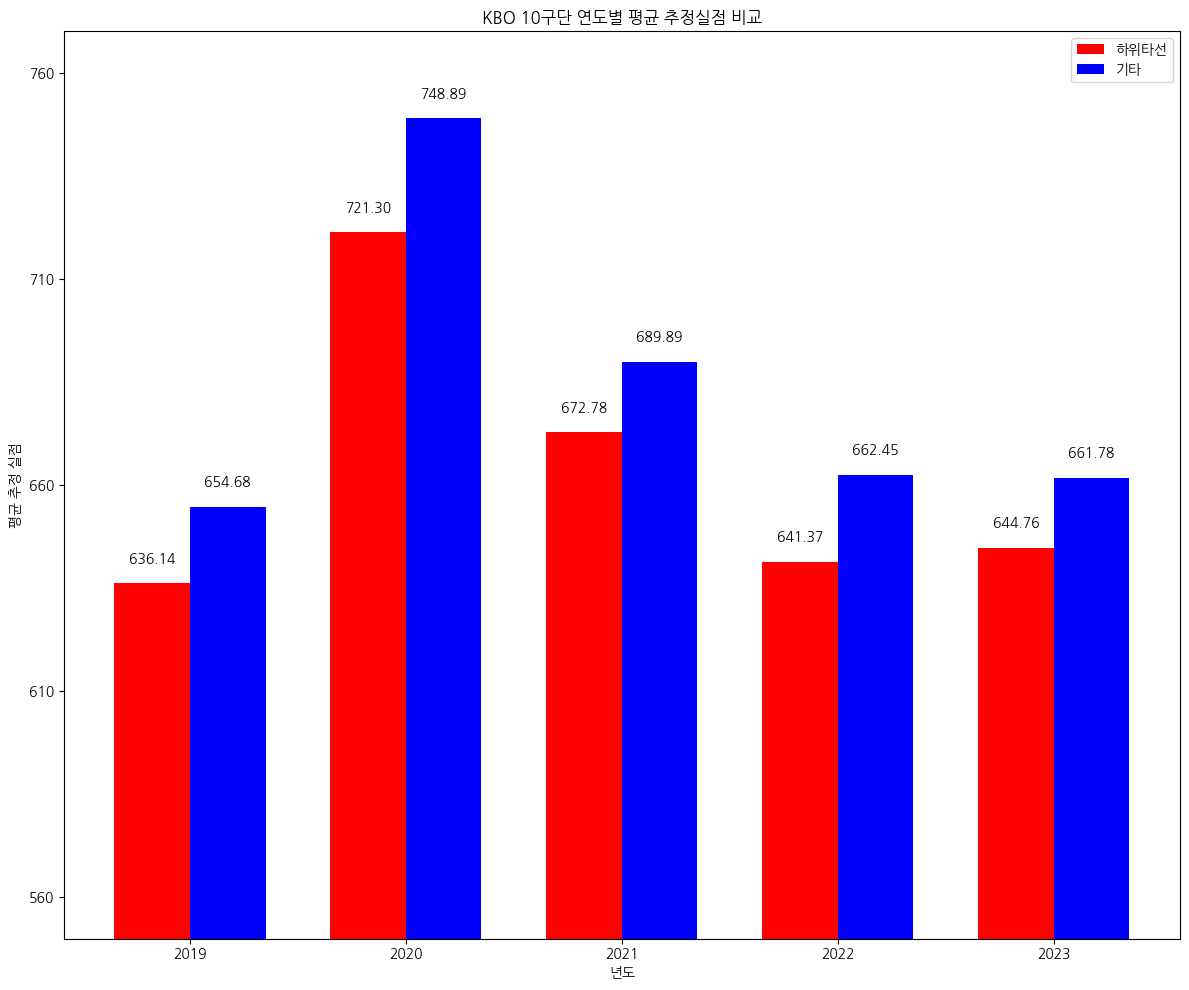

In [ ]:
# 데이터 입력
data = {
    '년도': [2019, 2020, 2021, 2022, 2023],
    '하위타선': [636.14, 721.30, 672.78, 641.37, 644.76],
    '기타': [654.68, 748.89, 689.89, 662.45, 661.78]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 시각화
plt.figure(figsize=(12, 10))

# 막대 그래프
bar_width = 0.35
index = range(len(df))

plt.bar(index, df['하위타선'], bar_width, label='하위타선', color='red')
plt.bar([i + bar_width for i in index], df['기타'], bar_width, label='기타', color='blue')

plt.xlabel('년도')
plt.ylabel('평균 추정 실점')
plt.title('KBO 10구단 연도별 평균 추정실점 비교')
plt.xticks([i + bar_width / 2 for i in index], df['년도'])
plt.yticks([560, 610, 660, 710, 760])
plt.ylim(550, 770)  # y축 범위 설정
plt.legend()

# 값 레이블 추가
for i in index:
    plt.text(i, df['하위타선'][i] + 5, f'{df["하위타선"][i]:.2f}', ha='center', color='black')
    plt.text(i + bar_width, df['기타'][i] + 5, f'{df["기타"][i]:.2f}', ha='center', color='black')

plt.tight_layout()
plt.show()